# Step 1: Understanding/Reading the Data

In [262]:
# Suppress all warnings

import warnings
warnings.filterwarnings('ignore')

In [263]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import os
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
# Import data for house

HousingDetails = pd.read_csv('train.csv')
HousingDetails.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [265]:
# Get houses info
HousingDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [266]:
# Shape of data columns
HousingDetails.shape

(1460, 81)

In [267]:
# Check if columns having null values
HousingDetails.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [268]:
HousingDetails.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Step 2 : Cleaning Data

# Removing/Imputing NaN values in attributes

In [269]:
# Check if there are null values in categorical attributes
HousingDetails.select_dtypes(include='object').isnull().sum()[HousingDetails.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [270]:
# For some features related to Garage, Pool, lley, basement,electrical etc. listed above if value is not there then it means these facilities are not
# available in that house, hence we can not consider those values as missing however we replace it with None

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    HousingDetails[col]=HousingDetails[col].fillna('None')

In [271]:
# Shape of data columns to verify the data volume
HousingDetails.shape

(1460, 81)

In [272]:
# Remove categorical attribute which have more then 88% data associated with single value
# as per below calculation we get the repeated values : 1285/1460 * 100 = 88%.
# Reason : These attributes would be skewed to one value

def TopCategoricalValCounts():
    column = []
    cat_columns = HousingDetails.select_dtypes(include=['object'])
    for col in (cat_columns):
        if(HousingDetails[col].value_counts().max() >= 1285):
            column.append(col)
    return column

columnstoRemoved = TopCategoricalValCounts()

# Remove the columns with skewed data

HousingDetails.drop(columnstoRemoved, axis = 1, inplace = True)

HousingDetails.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... 3SsnPorch  ScreenPorch  PoolArea  \
0      CollgCr       Norm     1Fam  ...         0            0         0   
1      Veenker      Feedr     1Fam  ...         0            0         0   
2      CollgCr       Norm     1Fam  ...         0            0         0   
3      Crawfor       Norm     1Fam  ...         0            0         0   
4      NoRidge       Norm     1Fam  ...         0            0         0   

   Fence  MiscVal MoSold YrSold SaleType SaleCondition  SalePrice  
0   None        0      2   2008       WD        Normal     208500  
1   None        0      5   2007       WD        Normal     181500  
2   None        0      9   2008       WD        Normal     223500  
3   None        0      2   2006       WD       Abnorml     140000  
4   None        0     12   2008       WD        Normal     250000  

[5 rows x 64 columns]

In [273]:
HousingDetails.fillna(0)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0        1          60       RL         65.0     8450      Reg    Inside   
1        2          20       RL         80.0     9600      Reg       FR2   
2        3          60       RL         68.0    11250      IR1    Inside   
3        4          70       RL         60.0     9550      IR1    Corner   
4        5          60       RL         84.0    14260      IR1       FR2   
5        6          50       RL         85.0    14115      IR1    Inside   
6        7          20       RL         75.0    10084      Reg    Inside   
7        8          60       RL          0.0    10382      IR1    Corner   
8        9          50       RM         51.0     6120      Reg    Inside   
9       10         190       RL         50.0     7420      Reg    Corner   
10      11          20       RL         70.0    11200      Reg    Inside   
11      12          60       RL         85.0    11924      IR1    Inside   
12      13          20       RL          0.0    12968      IR2    Inside   
13      14          20       RL         91.0    10652      IR1    Inside   
14      15          20       RL          0.0    10920      IR1    Corner   
15      16          45       RM         51.0     6120      Reg    Corner   
16      17          20       RL          0.0    11241      IR1   CulDSac   
17      18          90       RL         72.0    10791      Reg    Inside   
18      19          20       RL         66.0    13695      Reg    Inside   
19      20          20       RL         70.0     7560      Reg    Inside   
20      21          60       RL        101.0    14215      IR1    Corner   
21      22          45       RM         57.0     7449      Reg    Inside   
22      23          20       RL         75.0     9742      Reg    Inside   
23      24         120       RM         44.0     4224      Reg    Inside   
24      25          20       RL          0.0     8246      IR1    Inside   
25      26          20       RL        110.0    14230      Reg    Corner   
26      27          20       RL         60.0     7200      Reg    Corner   
27      28          20       RL         98.0    11478      Reg    Inside   
28      29          20       RL         47.0    16321      IR1   CulDSac   
29      30          30       RM         60.0     6324      IR1    Inside   
30      31          70  C (all)         50.0     8500      Reg    Inside   
31      32          20       RL          0.0     8544      IR1   CulDSac   
32      33          20       RL         85.0    11049      Reg    Corner   
33      34          20       RL         70.0    10552      IR1    Inside   
34      35         120       RL         60.0     7313      Reg    Inside   
35      36          60       RL        108.0    13418      Reg    Inside   
36      37          20       RL        112.0    10859      Reg    Corner   
37      38          20       RL         74.0     8532      Reg    Inside   
38      39          20       RL         68.0     7922      Reg    Inside   
39      40          90       RL         65.0     6040      Reg    Inside   
40      41          20       RL         84.0     8658      Reg    Inside   
41      42          20       RL        115.0    16905      Reg    Inside   
42      43          85       RL          0.0     9180      IR1   CulDSac   
43      44          20       RL          0.0     9200      IR1   CulDSac   
44      45          20       RL         70.0     7945      Reg    Inside   
45      46         120       RL         61.0     7658      Reg    Inside   
46      47          50       RL         48.0    12822      IR1   CulDSac   
47      48          20       FV         84.0    11096      Reg    Inside   
48      49         190       RM         33.0     4456      Reg    Inside   
49      50          20       RL         66.0     7742      Reg    Inside   
50      51          60       RL          0.0    13869      IR2    Corner   
51      52          50       RM         52.0     6240   

In [274]:
# Check if still there are null values in categorical features
HousingDetails.select_dtypes(include='object').isnull().sum()[HousingDetails.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

# Above result shows that there are no more null values in categorical calumns
# Now lets check and clean Null Values in Numerical features

In [275]:
# check the null values in the numerical features

HousingDetails.select_dtypes(include=['int64','float']).isnull().sum()[HousingDetails.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [276]:
# So we can see above that there are above variables for which imputation has to be done, replace null values with median

HousingDetails['LotFrontage'] = HousingDetails['LotFrontage'].replace(np.nan, HousingDetails['LotFrontage'].median())
HousingDetails['MasVnrArea'] = HousingDetails['MasVnrArea'].replace(np.nan, HousingDetails['MasVnrArea'].median())

In [277]:
# change null values with 0 for GarageYrBlt for now as we would be handling this column later

HousingDetails['GarageYrBlt']= HousingDetails['GarageYrBlt'].fillna(0)
HousingDetails['GarageYrBlt'] = HousingDetails['GarageYrBlt'].astype(int)

In [278]:
# Use data of column yearbuilt and identify if it was remodelled

def CheckRebuild(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
HousingDetails['IsRemodelled'] = HousingDetails.apply(CheckRebuild, axis=1)
HousingDetails.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... ScreenPorch  PoolArea  Fence  MiscVal  \
0      CollgCr       Norm     1Fam  ...           0         0   None        0   
1      Veenker      Feedr     1Fam  ...           0         0   None        0   
2      CollgCr       Norm     1Fam  ...           0         0   None        0   
3      Crawfor       Norm     1Fam  ...           0         0   None        0   
4      NoRidge       Norm     1Fam  ...           0         0   None        0   

   MoSold YrSold SaleType SaleCondition SalePrice  IsRemodelled  
0       2   2008       WD        Normal    208500             0  
1       5   2007       WD        Normal    181500             0  
2       9   2008       WD        Normal    223500             1  
3       2   2006       WD       Abnorml    140000             1  
4      12   2008       WD        Normal    250000             0  

[5 rows x 65 columns]

In [279]:
# Now lets check age of house at the time of selling

def getHouseRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
HousingDetails['Built_Remodel_Age'] = HousingDetails.apply(getHouseRemodelAge, axis=1)
HousingDetails.head()  

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... PoolArea  Fence  MiscVal  MoSold  \
0      CollgCr       Norm     1Fam  ...        0   None        0       2   
1      Veenker      Feedr     1Fam  ...        0   None        0       5   
2      CollgCr       Norm     1Fam  ...        0   None        0       9   
3      Crawfor       Norm     1Fam  ...        0   None        0       2   
4      NoRidge       Norm     1Fam  ...        0   None        0      12   

   YrSold SaleType SaleCondition SalePrice IsRemodelled  Built_Remodel_Age  
0    2008       WD        Normal    208500            0                  5  
1    2007       WD        Normal    181500            0                 31  
2    2008       WD        Normal    223500            1                  6  
3    2006       WD       Abnorml    140000            1                 36  
4    2008       WD        Normal    250000            0                  8  

[5 rows x 66 columns]

In [280]:
# Identify if Garage is old or new , in case Garage Yr Built less than year 2000 it will be considered as old (0)
# else new(1) for GarageYrBuilt , where we have imputed the value as 0 and will be considered as old

def getGarageConditionoldnew(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
HousingDetails['OldOrNewGarage'] = HousingDetails['GarageYrBlt'].apply(getGarageConditionoldnew)
HousingDetails.head() 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... Fence  MiscVal  MoSold  YrSold  \
0      CollgCr       Norm     1Fam  ...  None        0       2    2008   
1      Veenker      Feedr     1Fam  ...  None        0       5    2007   
2      CollgCr       Norm     1Fam  ...  None        0       9    2008   
3      Crawfor       Norm     1Fam  ...  None        0       2    2006   
4      NoRidge       Norm     1Fam  ...  None        0      12    2008   

   SaleType SaleCondition SalePrice IsRemodelled Built_Remodel_Age  \
0        WD        Normal    208500            0                 5   
1        WD        Normal    181500            0                31   
2        WD        Normal    223500            1                 6   
3        WD       Abnorml    140000            1                36   
4        WD        Normal    250000            0                 8   

   OldOrNewGarage  
0               1  
1               0  
2               1  
3               0  
4               1  

[5 rows x 67 columns]

In [281]:
# So as we have created new variables for house age, garage condition, so we can remove original features
HousingDetails.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [282]:
HousingDetails.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... PoolArea  Fence  MiscVal MoSold  \
0      CollgCr       Norm     1Fam  ...        0   None        0      2   
1      Veenker      Feedr     1Fam  ...        0   None        0      5   
2      CollgCr       Norm     1Fam  ...        0   None        0      9   
3      Crawfor       Norm     1Fam  ...        0   None        0      2   
4      NoRidge       Norm     1Fam  ...        0   None        0     12   

  SaleType SaleCondition SalePrice  IsRemodelled Built_Remodel_Age  \
0       WD        Normal    208500             0                 5   
1       WD        Normal    181500             0                31   
2       WD        Normal    223500             1                 6   
3       WD       Abnorml    140000             1                36   
4       WD        Normal    250000             0                 8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 63 columns]

In [283]:
# Remove numerical attribute which have more then 88% data associated with single value

In [284]:

# as per below calculation we get the repeated values : 1285/1460 * 100 = 88%.
# Reason : These attributes would be skewed to one value

def TopNumericalValCounts():
    column = []
    num_columns = HousingDetails.select_dtypes(include=['int64', 'float'])
    for col in (num_columns):
        if(HousingDetails[col].value_counts().max() >= 1285):
            column.append(col)
    return column

columnstoRemoved = TopCategoricalValCounts()

# Remove the columns with skewed data

HousingDetails.drop(columnstoRemoved, axis = 1, inplace = True)

HousingDetails.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... PoolArea  Fence  MiscVal MoSold  \
0      CollgCr       Norm     1Fam  ...        0   None        0      2   
1      Veenker      Feedr     1Fam  ...        0   None        0      5   
2      CollgCr       Norm     1Fam  ...        0   None        0      9   
3      Crawfor       Norm     1Fam  ...        0   None        0      2   
4      NoRidge       Norm     1Fam  ...        0   None        0     12   

  SaleType SaleCondition SalePrice  IsRemodelled Built_Remodel_Age  \
0       WD        Normal    208500             0                 5   
1       WD        Normal    181500             0                31   
2       WD        Normal    223500             1                 6   
3       WD       Abnorml    140000             1                36   
4       WD        Normal    250000             0                 8   

  OldOrNewGarage  
0              1  
1              0  
2              1  
3              0  
4              1  

[5 rows x 63 columns]

In [285]:
# Now Mosold - which is month sold as per data dictionary should also be dropped as we already calculated the age of house
HousingDetails.drop(['MoSold'], axis = 1, inplace = True)

In [286]:
# Now as we have done cleanup of null values so lets check the data % again to see how much null % is remaining
null_missing = round(100*(HousingDetails.isnull().sum()/len(HousingDetails.index)), 2)
print(null_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
Condition1           0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
ExterCond            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtFinType2         0.0
BsmtFinSF2           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea            0.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenAbvGr         0.0


# So now we dont have any null value in data

In [287]:
#Cross verify if there are any duplicate in data
HousingDetails[HousingDetails.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, LotShape, LotConfig, Neighborhood, Condition1, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, MiscVal, SaleType, SaleCondition, SalePrice, IsRemodelled, Built_Remodel_Age, OldOrNewGarage]
Index: []

[0 rows x 62 columns]

In [288]:
# So we dont have any duplicate as well,
# Lets check for outliers
HousingDetails.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    92.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   104.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   137.410000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      5.575342   103.117123   443.639726    46.549315   567.240411  ...   
std       1.112799   180.731373   456.098091   161.319273   441.866955  ...   
min       1.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%       5.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%       6.000000   164.250000   712.250000     0.000000   808.000000  ...   
90%       7.000000   335.000000  1065.500000   117.200000  1232.000000  ...   
95%       8.000000   456.000000  1274.000000   396.200000  1468.000000  ...   
99%       9.000000   791.280000  1572.410000   830.380000  1797.050000  ...   
max       9.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
90%     130.000000     112.000000     0.000000     0.000000     0.000000   
95%     175.050000     180.150000     0.000000   160.000000     0.000000   
99%     285.820000     261.050000   168.000000   268.050000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal      SalePrice  IsRemodelled  Built_Remodel_Age  \
count   1460.000000    1460.000000   1460.000000        1460.000000   
mean      43.489041  180921.195890      0.476712          22.950000   
std      496.123024   79442.502883      0.499629          20.640653   
min        0.000000   34900.000000      0.000000          -1.000000   
25%        0.000000  129975.000000      0.000000           4.000000   
50%        0.000000  163000.000000      0.000000          14.000000   
75%        0.000000  214000.000000      1.000000          41.000000   
90%        0.000000  278000.000000      1.000000          56.000000   
95%        0.000000  326100.000000      1.000000          58.000000   
99%      700.000000  442567.010000      1.000000          60.000000   
max    15500.000000  755000.000000      1.000000          60.000000   

       OldOrNewGarage  
count     1460.000000  
mean         0.275342  
std          0.446840  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
90%          1.000000  
95%          1.000000  
99%          1.000000  
max          1.000000  

[11 rows x 36 columns]

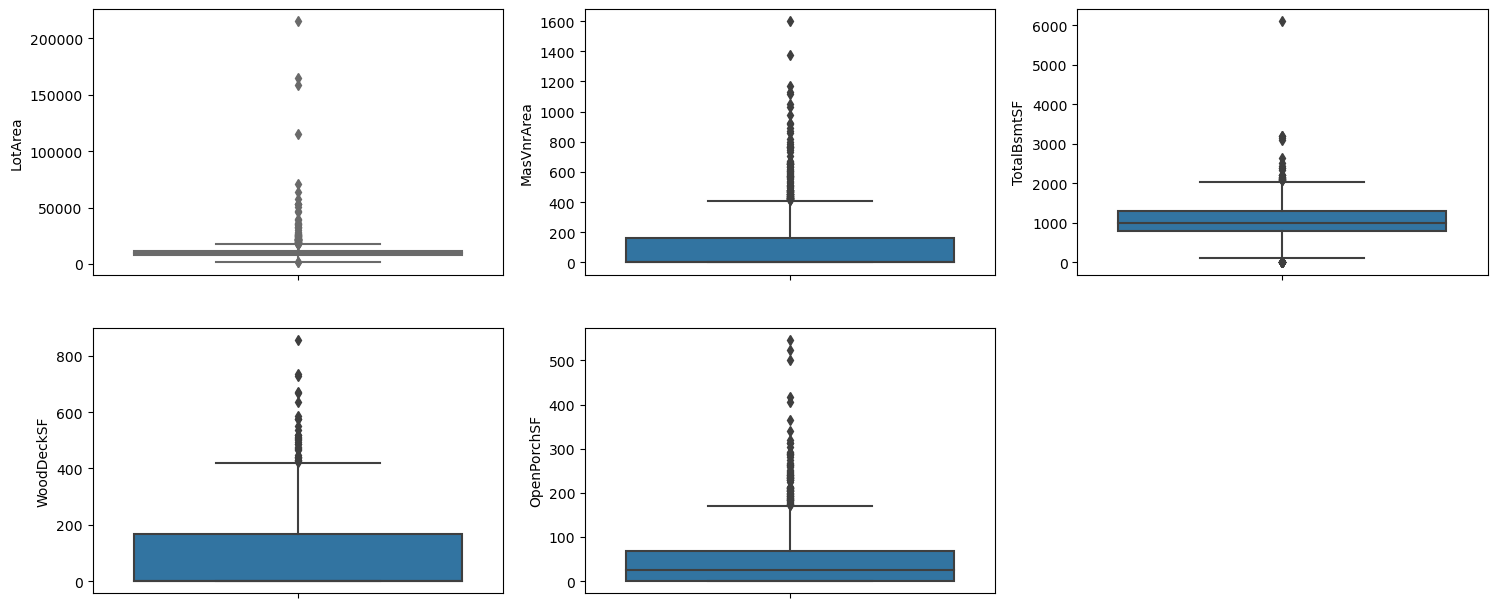

In [289]:
# Now lets check the boxplot for outliers for numeric features

plt.figure(figsize=(18,20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = HousingDetails)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', data = HousingDetails)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', data = HousingDetails)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', data = HousingDetails)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', data = HousingDetails)
plt.show()

In [290]:
# So we have outliers, now lets remove it
# Removing values beyond 98% for LotArea

quartile_LotArea = HousingDetails['LotArea'].quantile(0.98)
HousingDetails = HousingDetails[HousingDetails["LotArea"] < quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

quartile_MasVnrArea = HousingDetails['MasVnrArea'].quantile(0.98)
HousingDetails = HousingDetails[HousingDetails["MasVnrArea"] < quartile_MasVnrArea]

# Removing values beyond 98% for TotalBsmtSF

quartile_TotalBsmtSF = HousingDetails['TotalBsmtSF'].quantile(0.98)
HousingDetails = HousingDetails[HousingDetails["TotalBsmtSF"] < quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

quartile_WoodDeckSF = HousingDetails['WoodDeckSF'].quantile(0.98)
HousingDetails = HousingDetails[HousingDetails["WoodDeckSF"] < quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF
quartile_OpenPorchSF = HousingDetails['OpenPorchSF'].quantile(0.98)
HousingDetails = HousingDetails[HousingDetails["OpenPorchSF"] < quartile_OpenPorchSF]

# Step 3: Data visualization

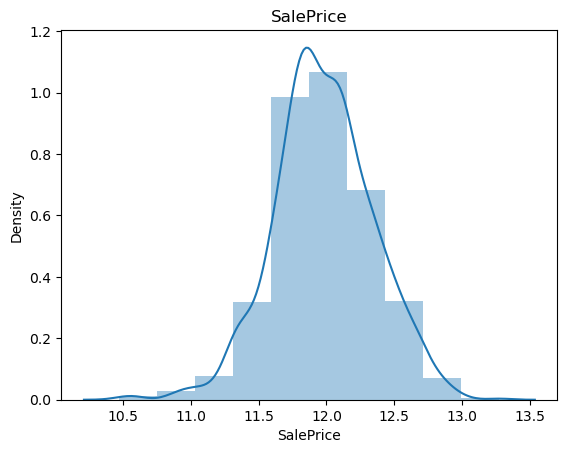

In [291]:
# Lets visualize data for sales price as target variable and its transformation

HousingDetails['SalePrice'] = np.log1p(HousingDetails['SalePrice'])

plt.title('SalePrice')
sns.distplot(HousingDetails['SalePrice'], bins=10)
plt.show()


In [292]:
# So values are normalized but also have some noise

In [293]:
# Now let analyse data with pairplot and comparing target variable i.e. salesprice vs other variables

<Figure size 1200x600 with 0 Axes>

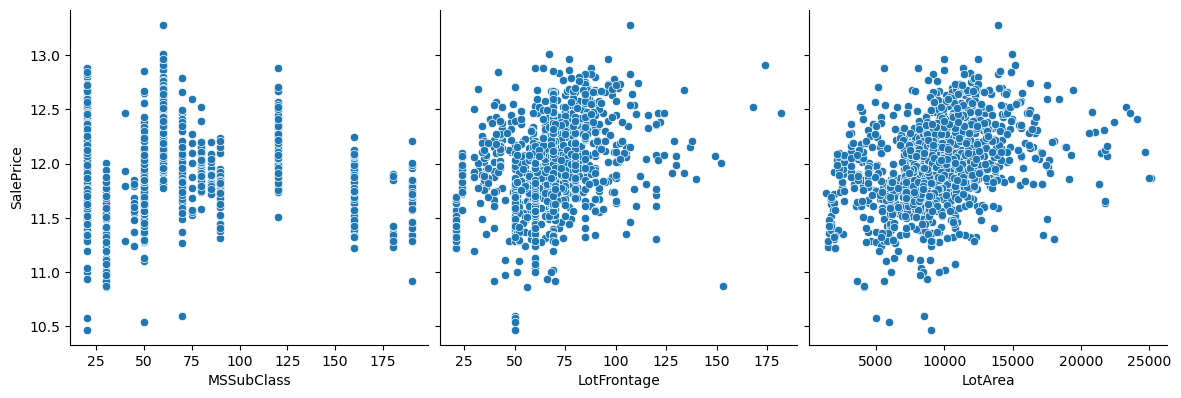

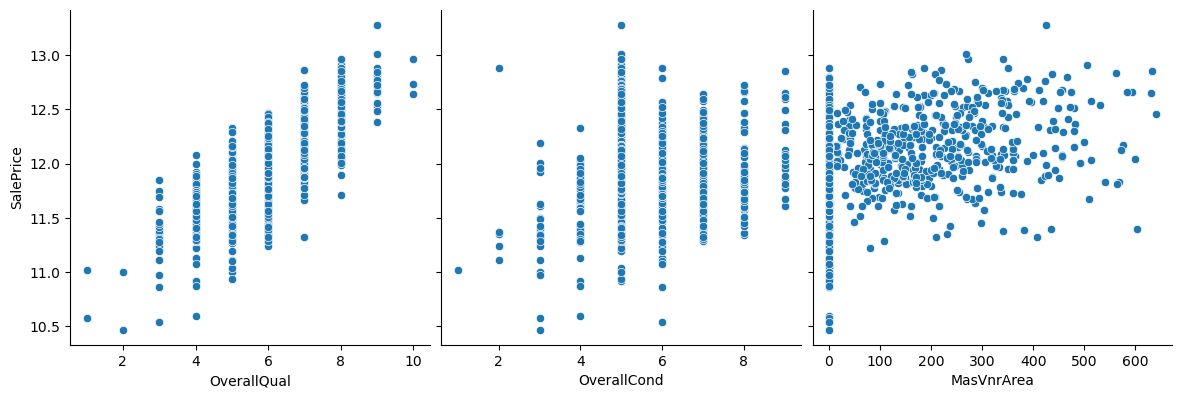

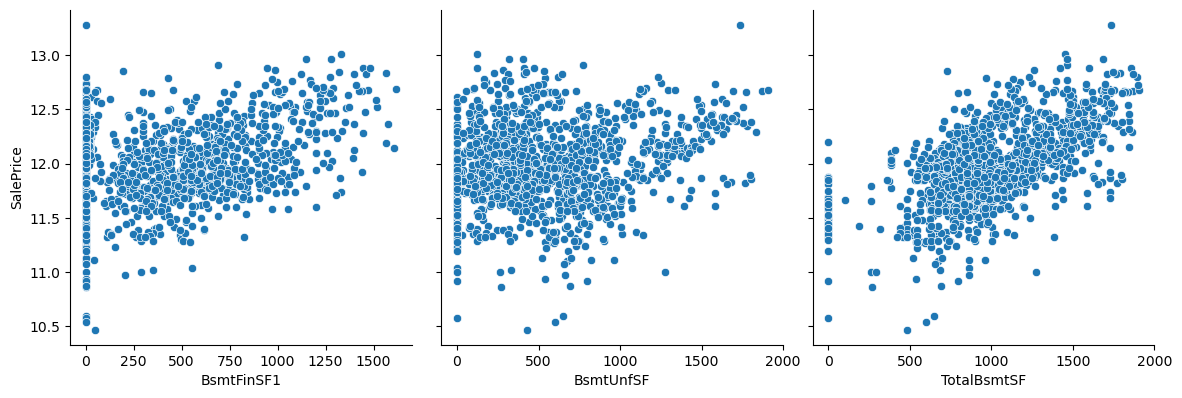

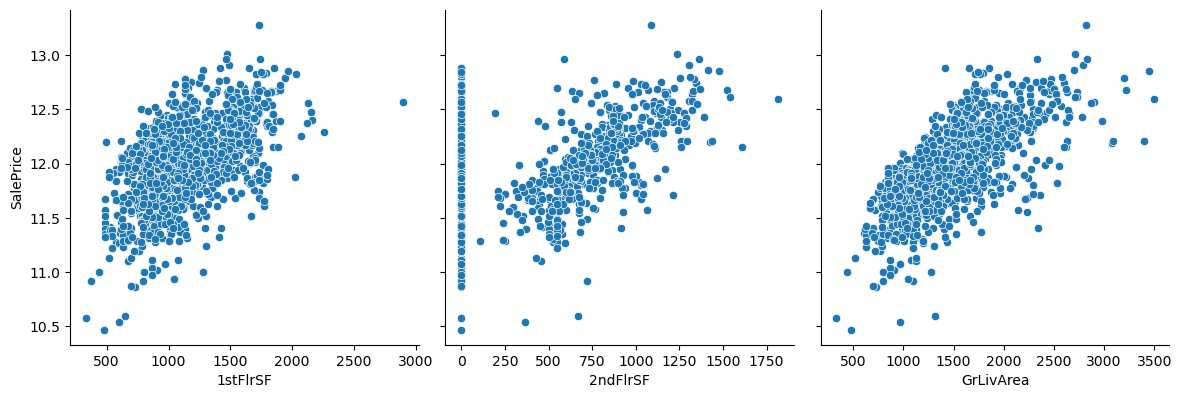

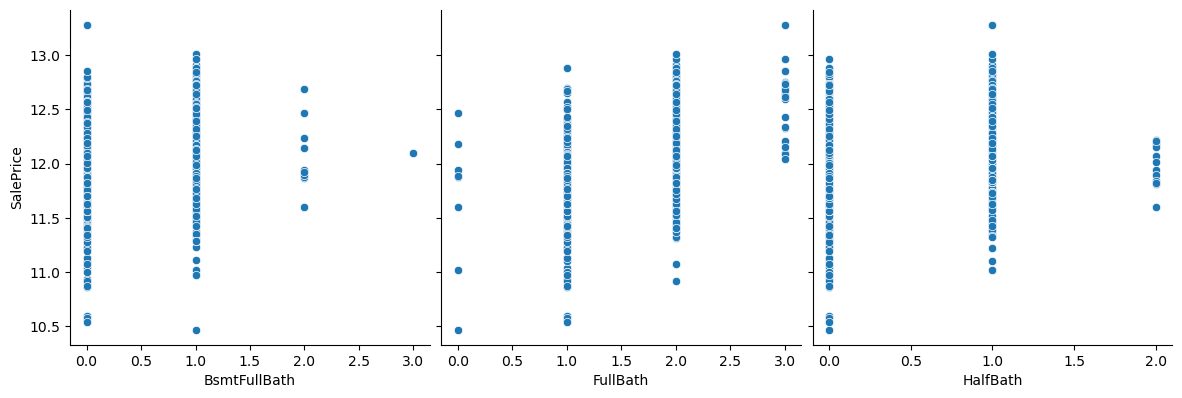

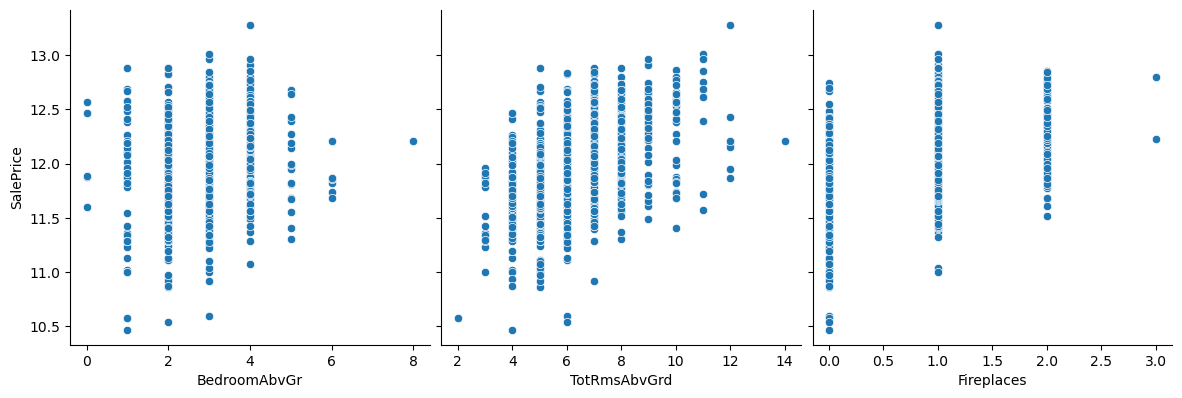

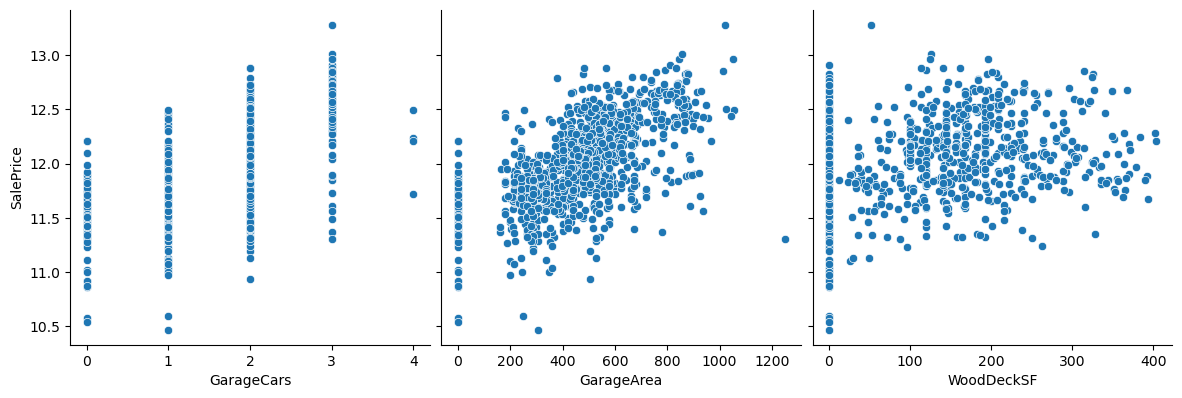

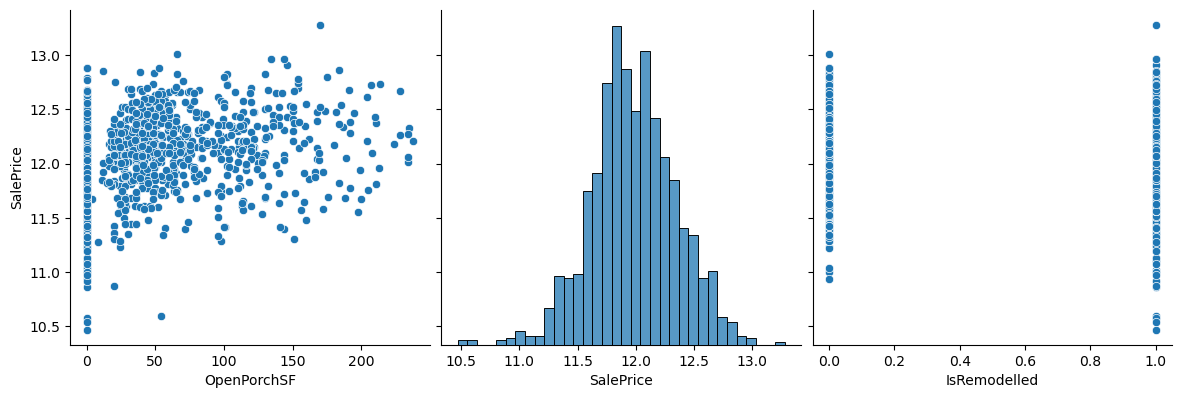

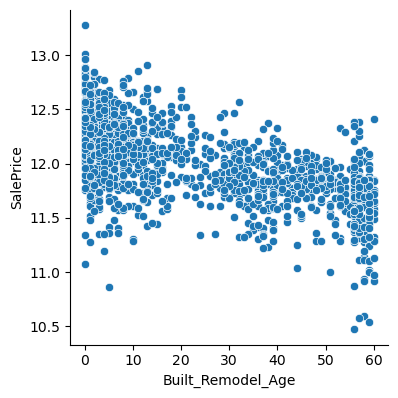

In [294]:
plt.figure(figsize=(12,6))
sns.pairplot(HousingDetails, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(HousingDetails, x_vars=['Built_Remodel_Age'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [295]:
# Conclusion : 1stFlrSF', 'GrLivArea' is having some correlation in increasing pattern in right directions.
# Other features data is scattered

In [296]:
# Lets check correlation in numerical features
HousingDetails.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id                 1.000000    0.015182    -0.028753 -0.000533    -0.027667   
MSSubClass         0.015182    1.000000    -0.397854 -0.392459     0.073532   
LotFrontage       -0.028753   -0.397854     1.000000  0.568800     0.166781   
LotArea           -0.000533   -0.392459     0.568800  1.000000     0.144897   
OverallQual       -0.027667    0.073532     0.166781  0.144897     1.000000   
OverallCond        0.019117   -0.064709    -0.050140 -0.012297    -0.087261   
MasVnrArea        -0.047821    0.038440     0.150942  0.084621     0.354681   
BsmtFinSF1        -0.016144   -0.056860     0.090962  0.128002     0.169572   
BsmtFinSF2         0.013980   -0.046989     0.040149  0.063612    -0.066832   
BsmtUnfSF         -0.008260   -0.136029     0.133828  0.086290     0.282176   
TotalBsmtSF       -0.021504   -0.239003     0.270976  0.266088     0.484945   
1stFlrSF          -0.001196   -0.248514     0.327769  0.368921     0.398493   
2ndFlrSF          -0.003369    0.312190     0.066214  0.117794     0.292130   
LowQualFinSF      -0.041149    0.043167     0.010959 -0.007249    -0.065116   
GrLivArea         -0.008112    0.111872     0.297834  0.372944     0.548332   
BsmtFullBath       0.007212    0.017714     0.027265  0.060175     0.089021   
BsmtHalfBath      -0.013670    0.000901    -0.012481  0.037031    -0.027809   
FullBath          -0.002321    0.149302     0.159306  0.176965     0.535565   
HalfBath           0.003093    0.186722     0.042668  0.090986     0.254880   
BedroomAbvGr       0.018839   -0.035466     0.258931  0.289563     0.111659   
KitchenAbvGr       0.006153    0.297693     0.009734 -0.000077    -0.192410   
TotRmsAbvGrd       0.014316    0.059193     0.296359  0.354425     0.369526   
Fireplaces        -0.010753   -0.024830     0.196139  0.294780     0.374869   
GarageCars         0.012927   -0.034987     0.252829  0.242696     0.576796   
GarageArea         0.008838   -0.097099     0.280871  0.278008     0.526929   
WoodDeckSF        -0.040236   -0.012482     0.060080  0.122725     0.232311   
OpenPorchSF       -0.048924    0.010827     0.140370  0.112261     0.359618   
EnclosedPorch      0.014736   -0.014958     0.000309  0.006347    -0.116088   
3SsnPorch         -0.063397   -0.042989     0.075701  0.097167     0.033990   
ScreenPorch       -0.002072   -0.025774     0.054185  0.089545     0.063709   
PoolArea           0.042119   -0.006576     0.023439  0.035343     0.011248   
MiscVal           -0.007611   -0.011669     0.007414  0.066848    -0.025869   
SalePrice         -0.020112   -0.049062     0.324739  0.363082     0.806290   
IsRemodelled       0.013522   -0.042459    -0.061582 -0.016742    -0.116159   
Built_Remodel_Age  0.013016   -0.055950    -0.053666 -0.026852    -0.543578   
OldOrNewGarage     0.005639    0.052224     0.059925 -0.029530     0.556946   

                   OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                    0.019117   -0.047821   -0.016144    0.013980  -0.008260   
MSSubClass           -0.064709    0.038440   -0.056860   -0.046989  -0.136029   
LotFrontage          -0.050140    0.150942    0.090962    0.040149   0.133828   
LotArea              -0.012297    0.084621    0.128002    0.063612   0.086290   
OverallQual          -0.087261    0.354681    0.169572   -0.066832   0.282176   
OverallCond           1.000000   -0.114961   -0.007800    0.038189  -0.142280   
MasVnrArea           -0.114961    1.000000    0.190805   -0.052657   0.086067   
BsmtFinSF1           -0.007800    0.190805    1.000000   -0.055258  -0.570777   
BsmtFinSF2            0.038189   -0.052657   -0.055258    1.000000  -0.221651   
BsmtUnfSF            -0.142280    0.086067   -0.570777   -0.221651   1.000000   
TotalBsmtSF          -0.157633    0.286916    0.410960    0.092716   0.442344   
1stFlrSF             -0.130642    0.280808    0.326660    0.097228   0.309075   
2ndFlrSF              0.018917    0.126017   -0.

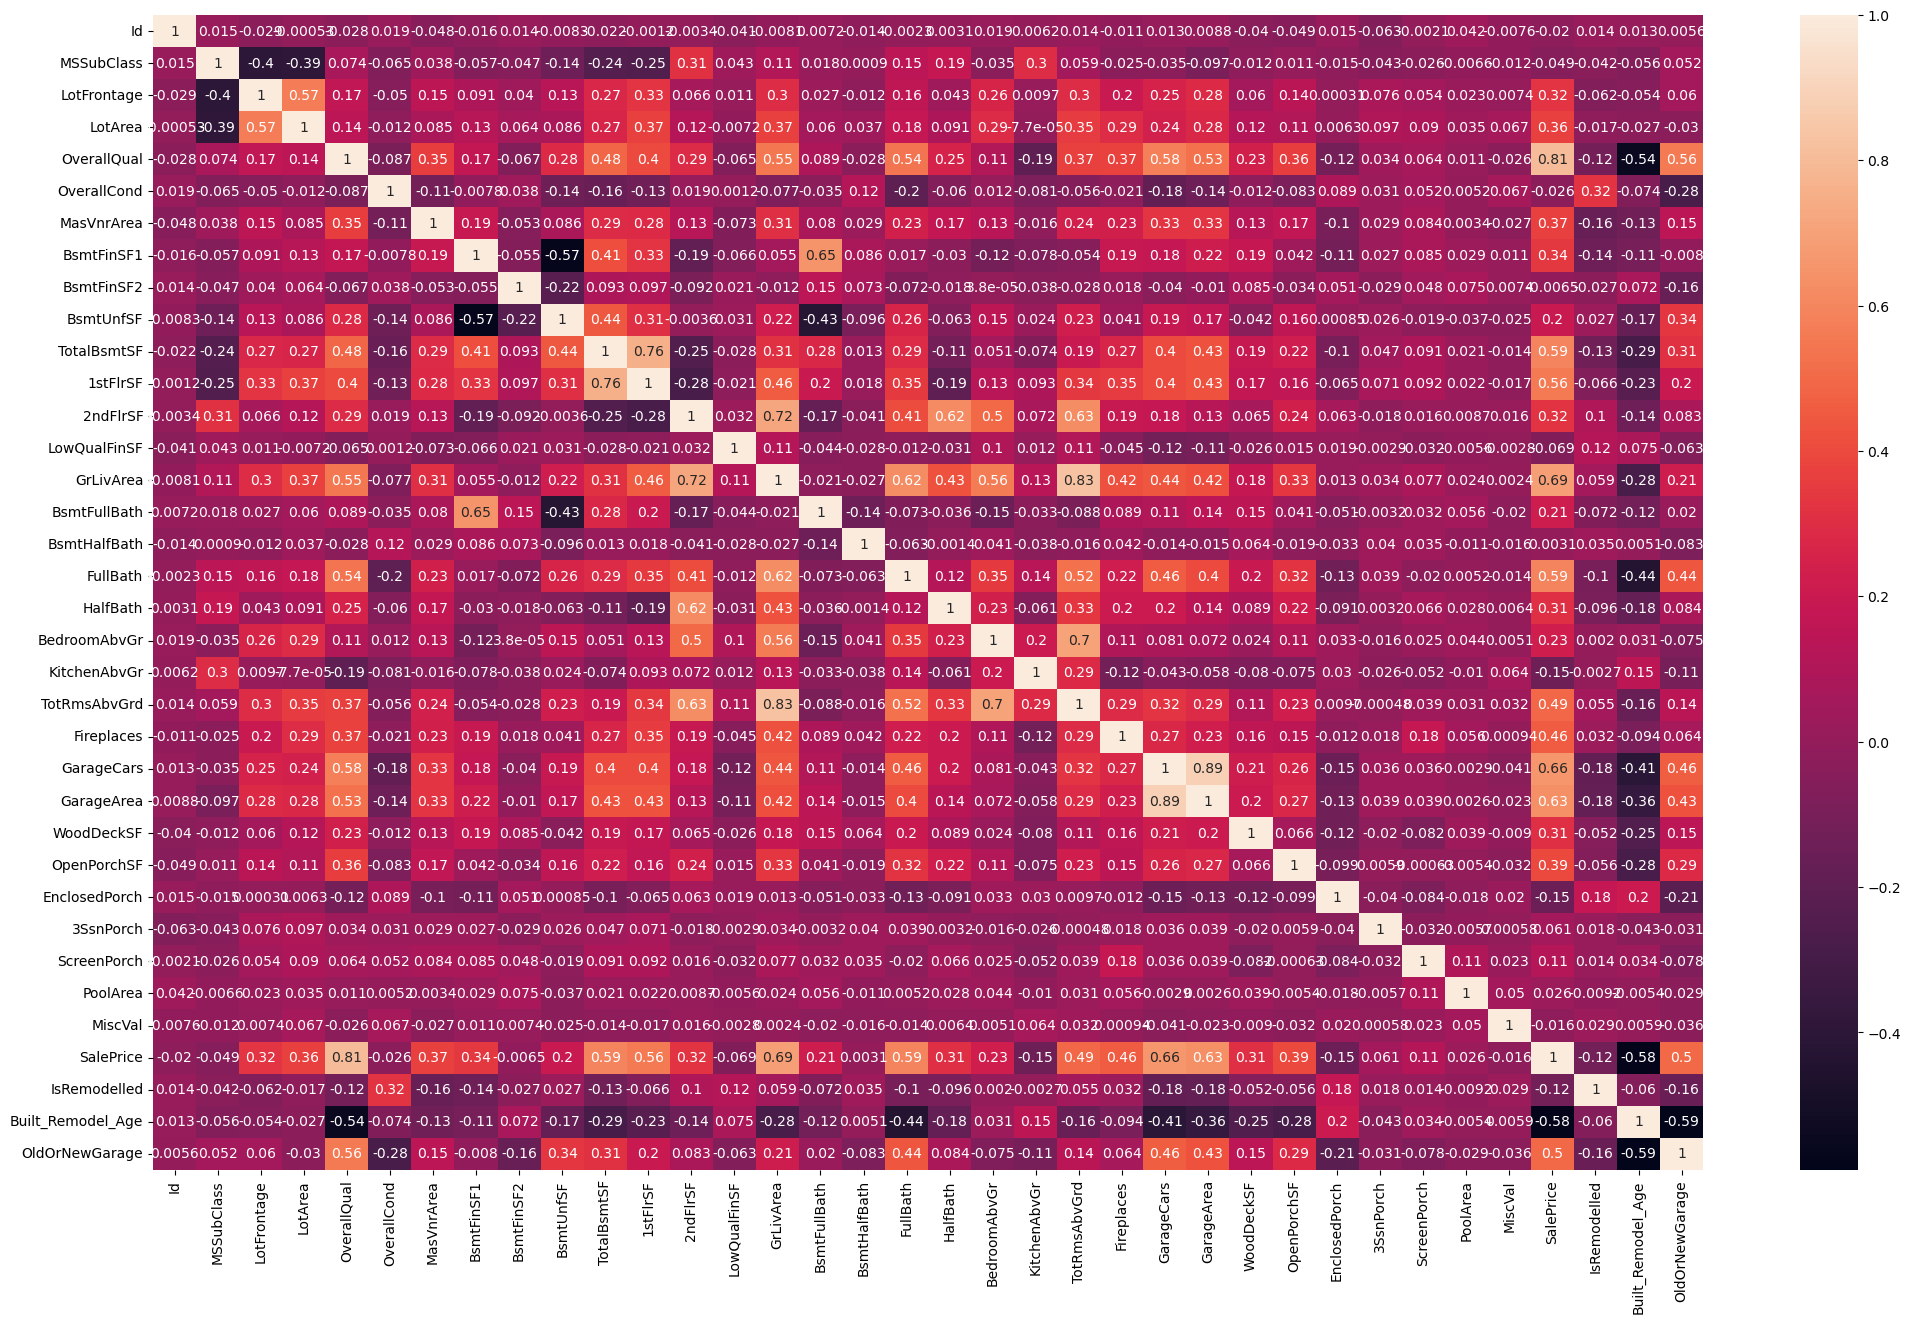

In [297]:
# Lets check correlation in numerical features - lets check plot
plt.figure(figsize = (25, 15))
sns.heatmap(HousingDetails.corr(), annot = True)
plt.show()

In [298]:
# below combination has high correlation, hence lets remove one:
# 1) TotRmsAbdGrd - GRLivArea -> 83%
# 2) GarageCars - GarageArea -> 89%

HousingDetails.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [299]:
HousingDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1317 non-null   int64  
 1   MSSubClass         1317 non-null   int64  
 2   MSZoning           1317 non-null   object 
 3   LotFrontage        1317 non-null   float64
 4   LotArea            1317 non-null   int64  
 5   LotShape           1317 non-null   object 
 6   LotConfig          1317 non-null   object 
 7   Neighborhood       1317 non-null   object 
 8   Condition1         1317 non-null   object 
 9   BldgType           1317 non-null   object 
 10  HouseStyle         1317 non-null   object 
 11  OverallQual        1317 non-null   int64  
 12  OverallCond        1317 non-null   int64  
 13  RoofStyle          1317 non-null   object 
 14  Exterior1st        1317 non-null   object 
 15  Exterior2nd        1317 non-null   object 
 16  MasVnrType         1317 

In [300]:
# Lets check shape of our dataset now
HousingDetails.shape

(1317, 60)

# Step 4: Lets prepare data
# - We will convert categorical variable to Numerical variable
# - We will create dummies wherever needed

In [301]:
HousingDetails['b_LotShape'] = HousingDetails['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
HousingDetails['b_ExterQual'] = HousingDetails['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
HousingDetails['b_BsmtQual'] = HousingDetails['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
HousingDetails['b_BsmtExposure'] = HousingDetails['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
HousingDetails['b_BsmtFinType1'] = HousingDetails['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
HousingDetails['b_HeatingQC'] = HousingDetails['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
HousingDetails['b_KitchenQual'] = HousingDetails['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
HousingDetails['b_FireplaceQu'] = HousingDetails['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
HousingDetails['b_GarageFinish'] = HousingDetails['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
HousingDetails['b_BldgType'] = HousingDetails['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
HousingDetails['b_HouseStyle'] = HousingDetails['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
HousingDetails['b_Fence'] = HousingDetails['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
HousingDetails['b_LotConfig'] = HousingDetails['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
HousingDetails['b_MasVnrType'] = HousingDetails['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
HousingDetails['b_SaleCondition'] = HousingDetails['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
HousingDetails['b_Condition1'] = HousingDetails['Condition1'].map({'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 
                                                                   'RRAn': 5, 'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9})
HousingDetails['b_BsmtFinType2'] = HousingDetails['BsmtFinType2'].map({'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 
                                                                   'LwQ': 5, 'Unf': 6, 'None': 0})
HousingDetails.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood Condition1 BldgType  ... b_FireplaceQu  b_GarageFinish  \
0      CollgCr       Norm     1Fam  ...             0               2   
1      Veenker      Feedr     1Fam  ...             3               2   
2      CollgCr       Norm     1Fam  ...             3               2   
3      Crawfor       Norm     1Fam  ...             4               1   
4      NoRidge       Norm     1Fam  ...             3               2   

   b_BldgType b_HouseStyle b_Fence b_LotConfig b_MasVnrType  b_SaleCondition  \
0           1            4       0           5            1                1   
1           1            1       0           2            0                1   
2           1            4       0           5            1                1   
3           1            4       0           4            0                0   
4           1            4       0           2            1                1   

  b_Condition1 b_BsmtFinType2  
0            3              6  
1            2              6  
2            3              6  
3            3              6  
4            3              6  

[5 rows x 77 columns]

In [302]:
# Now we will drop all the columns for which we have derived new columns data
HousingDetails = HousingDetails.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition','Condition1','BsmtFinType2'], axis=1)

HousingDetails.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  ...  b_FireplaceQu  \
0            5     Gable     VinylSd     VinylSd  ...              0   
1            8     Gable     MetalSd     MetalSd  ...              3   
2            5     Gable     VinylSd     VinylSd  ...              3   
3            5     Gable     Wd Sdng     Wd Shng  ...              4   
4            5     Gable     VinylSd     VinylSd  ...              3   

  b_GarageFinish b_BldgType  b_HouseStyle  b_Fence  b_LotConfig  b_MasVnrType  \
0              2          1             4        0            5             1   
1              2          1             1        0            2             0   
2              2          1             4        0            5             1   
3              1          1             4        0            4             0   
4              2          1             4        0            2             1   

   b_SaleCondition  b_Condition1  b_BsmtFinType2  
0                1             3               6  
1                1             2               6  
2                1             3               6  
3                0             3               6  
4                1             3               6  

[5 rows x 59 columns]

In [303]:
# Lets create dummies

# Creating dummies for MSZoning

b_MSZoning = pd.get_dummies(HousingDetails['MSZoning'], prefix='MSZoning', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_MSZoning], axis = 1)

# Creating dummies for Neighborhood

b_Neighborhood = pd.get_dummies(HousingDetails['Neighborhood'], prefix='Neighborhood', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

b_RoofStyle = pd.get_dummies(HousingDetails['RoofStyle'], prefix='RoofStyle', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

b_Exterior1st = pd.get_dummies(HousingDetails['Exterior1st'], prefix='Exterior1st', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

b_Exterior2nd = pd.get_dummies(HousingDetails['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_Exterior2nd], axis = 1)

# Creating dummies for Foundation

b_Foundation = pd.get_dummies(HousingDetails['Foundation'], prefix='Foundation', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_Foundation], axis = 1)

# Creating dummies for GarageType

b_GarageType = pd.get_dummies(HousingDetails['GarageType'], prefix='GarageType', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_GarageType], axis = 1)

# Creating dummies for ExterCond

b_ExterCond = pd.get_dummies(HousingDetails['ExterCond'], prefix='ExterCond', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_ExterCond], axis = 1)

# Creating dummies for SaleType

b_SaleType = pd.get_dummies(HousingDetails['SaleType'], prefix='SaleType', drop_first = True)
HousingDetails = pd.concat([HousingDetails, b_SaleType], axis = 1)

HousingDetails.head()

MSSubClass MSZoning  LotFrontage  LotArea Neighborhood  OverallQual  \
0          60       RL         65.0     8450      CollgCr            7   
1          20       RL         80.0     9600      Veenker            6   
2          60       RL         68.0    11250      CollgCr            7   
3          70       RL         60.0     9550      Crawfor            7   
4          60       RL         84.0    14260      NoRidge            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  ...  ExterCond_Po  \
0            5     Gable     VinylSd     VinylSd  ...             0   
1            8     Gable     MetalSd     MetalSd  ...             0   
2            5     Gable     VinylSd     VinylSd  ...             0   
3            5     Gable     Wd Sdng     Wd Shng  ...             0   
4            5     Gable     VinylSd     VinylSd  ...             0   

  ExterCond_TA SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0            1            0             0               0               0   
1            1            0             0               0               0   
2            1            0             0               0               0   
3            1            0             0               0               0   
4            1            0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0             0             0            1  
1               0             0             0            1  
2               0             0             0            1  
3               0             0             0            1  
4               0             0             0            1  

[5 rows x 144 columns]

In [304]:
# Now we will drop columns which we used to create dummies
HousingDetails = HousingDetails.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType','ExterCond','SaleType'], axis=1)

In [305]:
HousingDetails.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  ExterCond_Po  \
0         706           0        150          856  ...             0   
1         978           0        284         1262  ...             0   
2         486           0        434          920  ...             0   
3         216           0        540          756  ...             0   
4         655           0        490         1145  ...             0   

   ExterCond_TA  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             1             0             0               0               0   
1             1             0             0               0               0   
2             1             0             0               0               0   
3             1             0             0               0               0   
4             1             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0             0             0            1  
1               0             0             0            1  
2               0             0             0            1  
3               0             0             0            1  
4               0             0             0            1  

[5 rows x 135 columns]

In [306]:
# Lets check datatype now
HousingDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 1458
Columns: 135 entries, MSSubClass to SaleType_WD
dtypes: float64(3), int64(47), uint8(85)
memory usage: 634.1 KB


In [307]:
HousingDetails.isna().any()[lambda x: x]

Series([], dtype: bool)

In [308]:
# So now we have all numerical variable and no Null or NA

# Step 5 : Prepare Train and test data

In [309]:
# Prepare X considering SalesPrice as target variable
X = HousingDetails.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  ExterCond_Po  \
0         706           0        150          856  ...             0   
1         978           0        284         1262  ...             0   
2         486           0        434          920  ...             0   
3         216           0        540          756  ...             0   
4         655           0        490         1145  ...             0   

   ExterCond_TA  SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
0             1             0             0               0               0   
1             1             0             0               0               0   
2             1             0             0               0               0   
3             1             0             0               0               0   
4             1             0             0               0               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
0               0             0             0            1  
1               0             0             0            1  
2               0             0             0            1  
3               0             0             0            1  
4               0             0             0            1  

[5 rows x 134 columns]

In [310]:
# Putting response variable to y

y = HousingDetails['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

# Scaling the features 

In [311]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'ExterCond_Po', 'ExterCond_TA', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=134)

In [312]:
X.describe()

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
count  1.317000e+03  1.317000e+03  1.317000e+03  1.317000e+03  1.317000e+03   
mean  -6.474193e-17  2.738044e-16  1.213911e-16  1.213911e-16  1.969234e-16   
std    1.000380e+00  1.000380e+00  1.000380e+00  1.000380e+00  1.000380e+00   
min   -8.859115e-01 -2.462925e+00 -2.253282e+00 -3.854322e+00 -4.117706e+00   
25%   -8.859115e-01 -4.384200e-01 -5.651042e-01 -7.657050e-01 -5.227316e-01   
50%   -1.791500e-01  2.877341e-02 -4.342581e-02  6.449276e-03 -5.227316e-01   
75%    2.920243e-01  4.959668e-01  5.193936e-01  7.786035e-01  3.760119e-01   
max    3.119070e+00  5.894647e+00  4.406234e+00  3.095066e+00  3.072242e+00   

         MasVnrArea    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF  \
count  1.317000e+03  1.317000e+03  1.317000e+03  1.317000e+03  1.317000e+03   
mean  -1.025081e-16 -1.618548e-17 -2.495262e-17 -1.011593e-16 -6.743952e-17   
std    1.000380e+00  1.000380e+00  1.000380e+00  1.000380e+00  1.000380e+00   
min   -6.187380e-01 -1.011415e+00 -2.821018e-01 -1.307666e+00 -2.736798e+00   
25%   -6.187380e-01 -1.011415e+00 -2.821018e-01 -7.949153e-01 -6.124719e-01   
50%   -6.187380e-01 -1.305556e-01 -2.821018e-01 -1.810254e-01 -1.222429e-01   
75%    4.211469e-01  6.806311e-01 -2.821018e-01  5.669325e-01  6.403355e-01   
max    4.203917e+00  3.017148e+00  9.512791e+00  3.173025e+00  2.451459e+00   

       ...  ExterCond_Po  ExterCond_TA  SaleType_CWD  SaleType_Con  \
count  ...  1.317000e+03  1.317000e+03  1.317000e+03  1.317000e+03   
mean   ...  2.697581e-18 -4.585887e-17  1.079032e-17 -8.092742e-18   
std    ...  1.000380e+00  1.000380e+00  1.000380e+00  1.000380e+00   
min    ... -2.756589e-02 -2.698707e+00 -5.519473e-02 -3.899888e-02   
25%    ... -2.756589e-02  3.705478e-01 -5.519473e-02 -3.899888e-02   
50%    ... -2.756589e-02  3.705478e-01 -5.519473e-02 -3.899888e-02   
75%    ... -2.756589e-02  3.705478e-01 -5.519473e-02 -3.899888e-02   
max    ...  3.627671e+01  3.705478e-01  1.811767e+01  2.564176e+01   

       SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
count    1.317000e+03    1.317000e+03    1.317000e+03  1.317000e+03   
mean    -2.023185e-18   -1.079032e-17    5.395161e-18 -1.888306e-17   
std      1.000380e+00    1.000380e+00    1.000380e+00  1.000380e+00   
min     -8.295019e-02   -5.519473e-02   -6.173310e-02 -2.850979e-01   
25%     -8.295019e-02   -5.519473e-02   -6.173310e-02 -2.850979e-01   
50%     -8.295019e-02   -5.519473e-02   -6.173310e-02 -2.850979e-01   
75%     -8.295019e-02   -5.519473e-02   -6.173310e-02 -2.850979e-01   
max      1.205543e+01    1.811767e+01    1.619877e+01  3.507568e+00   

       SaleType_Oth   SaleType_WD  
count  1.317000e+03  1.317000e+03  
mean   2.697581e-18 -1.348790e-16  
std    1.000380e+00  1.000380e+00  
min   -4.778185e-02 -2.624162e+00  
25%   -4.778185e-02  3.810740e-01  
50%   -4.778185e-02  3.810740e-01  
75%   -4.778185e-02  3.810740e-01  
max    2.092845e+01  3.810740e-01  

[8 rows x 134 columns]

In [313]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [314]:
X_train.head() 

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1080   -0.179150    -0.438420  0.069642    -0.765705     2.173499   -0.618738   
274     3.119070     1.118891  1.790845    -0.765705    -0.522732   -0.196756   
323     0.527611     1.222712 -0.677612    -0.765705    -1.421475    0.285510   
864    -0.885911    -0.178868 -0.252209     0.778604    -0.522732   -0.618738   
325     0.645405     0.028773 -0.506891     0.006449     0.376012   -0.618738   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  ExterCond_Po  \
1080   -1.011415   -0.282102   0.343486    -0.824905  ...     -0.027566   
274     1.081248   -0.282102  -0.545596     0.436073  ...     -0.027566   
323    -0.264924    1.671561  -0.206898     0.155554  ...     -0.027566   
864     0.727909   -0.282102   0.192954     0.904515  ...     -0.027566   
325     0.912043   -0.282102  -1.037178    -0.318335  ...     -0.027566   

      ExterCond_TA  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
1080      0.370548     -0.055195     -0.038999        -0.08295   
274       0.370548     -0.055195     -0.038999        -0.08295   
323       0.370548     -0.055195     -0.038999        -0.08295   
864       0.370548     -0.055195     -0.038999        -0.08295   
325       0.370548     -0.055195     -0.038999        -0.08295   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  
1080       -0.055195       -0.061733     -0.285098     -0.047782     0.381074  
274        -0.055195       -0.061733     -0.285098     -0.047782     0.381074  
323        -0.055195       -0.061733     -0.285098     -0.047782     0.381074  
864        -0.055195       -0.061733     -0.285098     -0.047782     0.381074  
325        -0.055195       -0.061733     -0.285098     -0.047782     0.381074  

[5 rows x 134 columns]

In [315]:
y_train.head()

1192    11.736077
300     11.964007
358     11.775297
958     12.128117
360     11.957618
Name: SalePrice, dtype: float64

# Now we will use RFE to select best 40 features

In [316]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [317]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-95421801.82497501
[-4.97420821e-03  7.36405822e-03  1.69401769e-02  6.56704231e-02
  3.94966929e-02 -1.06464731e-03 -5.63101817e+10 -2.10856980e+10
 -5.95717233e+10  5.14474286e+10 -4.07322515e+10 -5.19075232e+10
 -5.71962331e+09  5.65766618e+10  1.08141899e-02  5.71346283e-03
  1.45864487e-02  1.78489685e-02  5.12695312e-03 -7.33757019e-03
  4.19712067e-03  3.05681229e-02  1.05247498e-02  2.98881531e-03
  3.00979614e-03  2.39753723e-03  1.35002136e-02 -2.00527349e+09
  3.01074982e-03 -1.26152039e-02 -2.36778259e-02  1.47707462e-02
 -2.47859955e-03 -5.50889969e-03  1.39389038e-02  1.38187408e-02
  6.78157806e-03  1.99052095e-02  1.17621422e-02  8.45527649e-03
  1.15501881e-02 -1.60551071e-02  5.97763062e-03 -2.08473206e-03
  1.27220154e-03  6.64401054e-03  1.71241760e-02 -2.93993950e-03
 -1.15184784e-02  8.85205269e-02  4.59594727e-02  1.73496246e-01
  1.39186859e-01 -2.63214111e-04 -3.64589691e-03  2.76374817e-03
 -1.09386444e-03 -4.22859192e-03  1.34255886e-02 -2.19659805e-02
 -8.52

In [318]:
# Running RFE with the output number of the variable equal to 40
rfe = RFE(lm, n_features_to_select=40, step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [319]:
# Now check the columns supporting RFE
cols = X_train.columns[rfe.support_]
# Lets assign these columns to a dataframe seperately
HousingDetails_RFE = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
HousingDetails_RFE = HousingDetails_RFE.loc[HousingDetails_RFE['rfe_support'] == True]
HousingDetails_RFE.reset_index(drop=True, inplace=True)

HousingDetails_RFE

Variable  rfe_support  rfe_ranking
0                LotArea         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3             BsmtFinSF1         True            1
4             BsmtFinSF2         True            1
5              BsmtUnfSF         True            1
6            TotalBsmtSF         True            1
7               1stFlrSF         True            1
8               2ndFlrSF         True            1
9           LowQualFinSF         True            1
10             GrLivArea         True            1
11              HalfBath         True            1
12            GarageCars         True            1
13          IsRemodelled         True            1
14     Built_Remodel_Age         True            1
15        b_BsmtExposure         True            1
16           b_HeatingQC         True            1
17         b_KitchenQual         True            1
18         b_FireplaceQu         True            1
19        b_GarageFinish         True            1
20            b_BldgType         True            1
21       b_SaleCondition         True            1
22           MSZoning_FV         True            1
23           MSZoning_RH         True            1
24           MSZoning_RL         True            1
25           MSZoning_RM         True            1
26  Neighborhood_Crawfor         True            1
27  Neighborhood_NridgHt         True            1
28  Neighborhood_OldTown         True            1
29  Neighborhood_Somerst         True            1
30   Exterior1st_BrkComm         True            1
31    Exterior1st_CBlock         True            1
32   Exterior1st_Wd Sdng         True            1
33    Exterior2nd_CBlock         True            1
34   Exterior2nd_Wd Sdng         True            1
35     Foundation_CBlock         True            1
36      Foundation_PConc         True            1
37       Foundation_Slab         True            1
38     GarageType_Attchd         True            1
39           SaleType_WD         True            1

In [320]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'HalfBath', 'GarageCars', 'IsRemodelled',
       'Built_Remodel_Age', 'b_BsmtExposure', 'b_HeatingQC', 'b_KitchenQual',
       'b_FireplaceQu', 'b_GarageFinish', 'b_BldgType', 'b_SaleCondition',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Somerst', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_Wd Sdng', 'Exterior2nd_CBlock', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_Attchd', 'SaleType_WD'],
      dtype='object')

In [321]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [322]:
# lets have data also attached to test model with train
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Step 6 : Build Model and Evaluate

# Ridge

In [323]:
# list of Alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

Housing_ridge = Ridge()

# cross validation

folds = 5
Housing_ridge_model_cv = GridSearchCV(estimator = Housing_ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
Housing_ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [324]:
# display the mean scores for Ridge

Housing_ridge_cv_results = pd.DataFrame(Housing_ridge_model_cv.cv_results_)
Housing_ridge_cv_results = Housing_ridge_cv_results[Housing_ridge_cv_results['param_alpha']<=500]
Housing_ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
8          0.6         -0.077058        -0.082575                1
9          0.7         -0.077057        -0.082576                2
7          0.5         -0.077059        -0.082578                3
10         0.8         -0.077056        -0.082579                4
6          0.4         -0.077061        -0.082581                5
11         0.9         -0.077055        -0.082583                6
5          0.3         -0.077062        -0.082584                7
12         1.0         -0.077055        -0.082586                8
4          0.2         -0.077064        -0.082588                9
3          0.1         -0.077067        -0.082591               10
2         0.01         -0.077069        -0.082594               11
1        0.001         -0.077069        -0.082594               12
0       0.0001         -0.077069        -0.082594               13
13         2.0         -0.077062        -0.082617               14
14         3.0         -0.077082        -0.082644               15
15         4.0         -0.077114        -0.082668               16
16         5.0         -0.077150        -0.082687               17
17         6.0         -0.077193        -0.082703               18
18         7.0         -0.077240        -0.082715               19
19         8.0         -0.077284        -0.082726               20
20         9.0         -0.077325        -0.082735               21
21        10.0         -0.077368        -0.082746               22
22          20         -0.077742        -0.082978               23
23          50         -0.078512        -0.083291               24
24         100         -0.079544        -0.083866               25
25         500         -0.087424        -0.090359               26

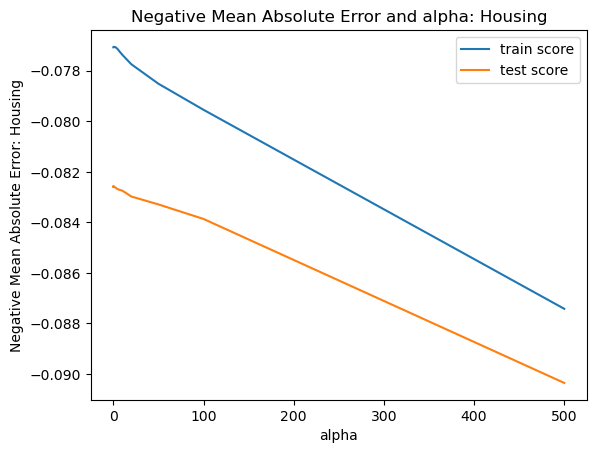

In [325]:
# plotting mean test and train scoes with alpha 

Housing_ridge_cv_results['param_alpha'] = Housing_ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(Housing_ridge_cv_results['param_alpha'], Housing_ridge_cv_results['mean_train_score'])
plt.plot(Housing_ridge_cv_results['param_alpha'], Housing_ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error: Housing')
plt.title("Negative Mean Absolute Error and alpha: Housing")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [326]:
# Printing the best hyperparameter alpha
print(Housing_ridge_model_cv.best_params_)

{'alpha': 0.6}


In [327]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.6
Housing_ridge = Ridge(alpha=alpha)

Housing_ridge.fit(X_train, y_train)
print(Housing_ridge.coef_)

[ 0.0169417   0.08493513  0.03696409  0.0413452   0.00787386 -0.00070288
  0.04766632  0.03139814  0.04315104  0.00472188  0.06267227  0.01181305
  0.04375685 -0.01371695 -0.02801125  0.01826064  0.01992501  0.01554675
  0.01442301  0.01777405 -0.02096549  0.01844691  0.08293233  0.03988035
  0.15912124  0.12562821  0.02111411  0.01509612 -0.01273121  0.01412459
 -0.0238593  -0.00168997 -0.02452313 -0.00168997  0.01604594  0.02713481
  0.04908516  0.01895912  0.00661425 -0.01500567]


In [328]:
# Check mean square error
mean_squared_error(y_test,Housing_ridge.predict(X_test))

0.014158558924957489

In [329]:
# Let put features and its coef together
Housing_ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':Housing_ridge.coef_.round(4)})
Housing_ridge_df.reset_index(drop=True, inplace=True)
Housing_ridge_df

Features  Coefficient
0                LotArea       0.0169
1            OverallQual       0.0849
2            OverallCond       0.0370
3             BsmtFinSF1       0.0413
4             BsmtFinSF2       0.0079
5              BsmtUnfSF      -0.0007
6            TotalBsmtSF       0.0477
7               1stFlrSF       0.0314
8               2ndFlrSF       0.0432
9           LowQualFinSF       0.0047
10             GrLivArea       0.0627
11              HalfBath       0.0118
12            GarageCars       0.0438
13          IsRemodelled      -0.0137
14     Built_Remodel_Age      -0.0280
15        b_BsmtExposure       0.0183
16           b_HeatingQC       0.0199
17         b_KitchenQual       0.0155
18         b_FireplaceQu       0.0144
19        b_GarageFinish       0.0178
20            b_BldgType      -0.0210
21       b_SaleCondition       0.0184
22           MSZoning_FV       0.0829
23           MSZoning_RH       0.0399
24           MSZoning_RL       0.1591
25           MSZoning_RM       0.1256
26  Neighborhood_Crawfor       0.0211
27  Neighborhood_NridgHt       0.0151
28  Neighborhood_OldTown      -0.0127
29  Neighborhood_Somerst       0.0141
30   Exterior1st_BrkComm      -0.0239
31    Exterior1st_CBlock      -0.0017
32   Exterior1st_Wd Sdng      -0.0245
33    Exterior2nd_CBlock      -0.0017
34   Exterior2nd_Wd Sdng       0.0160
35     Foundation_CBlock       0.0271
36      Foundation_PConc       0.0491
37       Foundation_Slab       0.0190
38     GarageType_Attchd       0.0066
39           SaleType_WD      -0.0150

In [330]:
# we will move data as a dictionary for bar plot later
Housing_ridge_coef_dict = dict(pd.Series(Housing_ridge.coef_.round(4), index = X_train.columns))
Housing_ridge_coef_dict

{'LotArea': 0.0169,
 'OverallQual': 0.0849,
 'OverallCond': 0.037,
 'BsmtFinSF1': 0.0413,
 'BsmtFinSF2': 0.0079,
 'BsmtUnfSF': -0.0007,
 'TotalBsmtSF': 0.0477,
 '1stFlrSF': 0.0314,
 '2ndFlrSF': 0.0432,
 'LowQualFinSF': 0.0047,
 'GrLivArea': 0.0627,
 'HalfBath': 0.0118,
 'GarageCars': 0.0438,
 'IsRemodelled': -0.0137,
 'Built_Remodel_Age': -0.028,
 'b_BsmtExposure': 0.0183,
 'b_HeatingQC': 0.0199,
 'b_KitchenQual': 0.0155,
 'b_FireplaceQu': 0.0144,
 'b_GarageFinish': 0.0178,
 'b_BldgType': -0.021,
 'b_SaleCondition': 0.0184,
 'MSZoning_FV': 0.0829,
 'MSZoning_RH': 0.0399,
 'MSZoning_RL': 0.1591,
 'MSZoning_RM': 0.1256,
 'Neighborhood_Crawfor': 0.0211,
 'Neighborhood_NridgHt': 0.0151,
 'Neighborhood_OldTown': -0.0127,
 'Neighborhood_Somerst': 0.0141,
 'Exterior1st_BrkComm': -0.0239,
 'Exterior1st_CBlock': -0.0017,
 'Exterior1st_Wd Sdng': -0.0245,
 'Exterior2nd_CBlock': -0.0017,
 'Exterior2nd_Wd Sdng': 0.016,
 'Foundation_CBlock': 0.0271,
 'Foundation_PConc': 0.0491,
 'Foundation_Slab': 0

In [331]:
# Lets again do RFE for top 12 variables 

# Do an RFE to minimise the features to 12
X_train_ridge_top = X_train[Housing_ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge_top, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=12, step=1)            
rfe = rfe.fit(X_train_ridge_top, y_train)

In [332]:
# Method to get the coefficient values and then identifying top 10 variables for house pricing

def find(x):
    return Housing_ridge_coef_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

Housing_temp_df = pd.DataFrame(list(zip( X_train_ridge_top.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
Housing_temp_df = Housing_temp_df.loc[Housing_temp_df['rfe_support'] == True]
Housing_temp_df.reset_index(drop=True, inplace=True)

Housing_temp_df['Coefficient'] = Housing_temp_df['Features'].apply(find)
Housing_temp_df = Housing_temp_df.sort_values(by=['Coefficient'], ascending=False)
Housing_temp_df = Housing_temp_df.head(10)
Housing_temp_df

Features  rfe_support  rfe_ranking  Coefficient
9        MSZoning_RL         True            1       0.1591
10       MSZoning_RM         True            1       0.1256
0        OverallQual         True            1       0.0849
7        MSZoning_FV         True            1       0.0829
4          GrLivArea         True            1       0.0627
11  Foundation_PConc         True            1       0.0491
3        TotalBsmtSF         True            1       0.0477
5         GarageCars         True            1       0.0438
2         BsmtFinSF1         True            1       0.0413
8        MSZoning_RH         True            1       0.0399

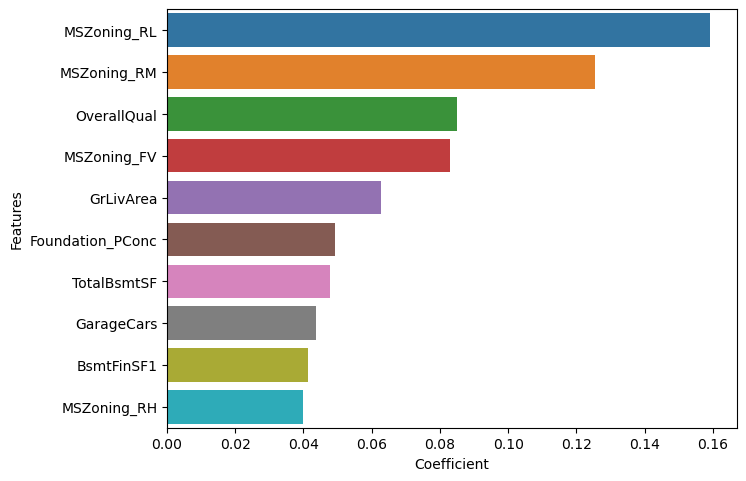

In [333]:
# Let draw bar plot for top 10 variables which will impact prices of house

plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = Housing_temp_df)
plt.show()

In [334]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = Housing_ridge.predict(X_train)
y_pred_test = Housing_ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.914215398463482
0.8971469230654029
10.493203030363231
5.606789334283166
0.011393271477050196
0.014158558924957489


# Conclusion Ridge:

# Above model shows top variables which will help in predicting house prices, Variables are listed below:
# 1) MSZoning
# 2) OverallQual
# 3) GRLivArea
# 4) Foundation_PConc
# 5) TotalBsmtSF
# 6) GarageCars
# 7) BsmtFinSF1



# Lasso

In [335]:
lasso = Lasso()

# cross validation
Lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

Lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [336]:
# display the mean scores

Housing_lasso_cv_results = pd.DataFrame(Lasso_model_cv.cv_results_)
Housing_lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001         -0.077052        -0.082590                1
1        0.001         -0.077424        -0.083054                2
2         0.01         -0.084519        -0.088587                3
3          0.1         -0.153449        -0.154958                4
4          0.2         -0.226281        -0.227397                5
5          0.3         -0.282132        -0.282683                6
24         100         -0.283773        -0.284050                7
23          50         -0.283773        -0.284050                7
22          20         -0.283773        -0.284050                7
21        10.0         -0.283773        -0.284050                7
20         9.0         -0.283773        -0.284050                7
19         8.0         -0.283773        -0.284050                7
18         7.0         -0.283773        -0.284050                7
17         6.0         -0.283773        -0.284050                7
16         5.0         -0.283773        -0.284050                7
13         2.0         -0.283773        -0.284050                7
14         3.0         -0.283773        -0.284050                7
25         500         -0.283773        -0.284050                7
12         1.0         -0.283773        -0.284050                7
11         0.9         -0.283773        -0.284050                7
10         0.8         -0.283773        -0.284050                7
9          0.7         -0.283773        -0.284050                7
8          0.6         -0.283773        -0.284050                7
7          0.5         -0.283773        -0.284050                7
6          0.4         -0.283773        -0.284050                7
15         4.0         -0.283773        -0.284050                7
26        1000         -0.283773        -0.284050                7

In [337]:
# Printing the best hyperparameter alpha
print(Lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [338]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

Housing_lasso = Lasso(alpha=alpha)
        
Housing_lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [339]:
Housing_lasso.coef_

array([ 1.68880312e-02,  8.51570809e-02,  3.69000492e-02,  4.19800743e-02,
        8.09252476e-03, -0.00000000e+00,  4.68706942e-02,  1.65804058e-02,
        2.39567404e-02,  2.41555595e-03,  8.35222005e-02,  1.17392280e-02,
        4.37424202e-02, -1.36410052e-02, -2.79567026e-02,  1.81567615e-02,
        1.98048528e-02,  1.55512839e-02,  1.43594960e-02,  1.77833782e-02,
       -2.07488838e-02,  1.84574850e-02,  8.24408643e-02,  3.94209221e-02,
        1.58011521e-01,  1.24341225e-01,  2.09409784e-02,  1.49222905e-02,
       -1.26791610e-02,  1.39178411e-02, -2.37369982e-02, -3.28567963e-03,
       -2.39887754e-02, -3.33493478e-05,  1.54604008e-02,  2.65016182e-02,
        4.85573544e-02,  1.86206883e-02,  6.57582263e-03, -1.48763324e-02])

In [340]:
# Check the mean squared error

mean_squared_error(y_test, Housing_lasso.predict(X_test))

0.014118674577084734

In [341]:
# Add important features and coef in a dataframe

Housing_lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':Housing_lasso.coef_.round(4)})
Housing_lasso_df = Housing_lasso_df[Housing_lasso_df['Coefficient'] != 0.00]
Housing_lasso_df.reset_index(drop=True, inplace=True)
Housing_lasso_df

Features  Coefficient
0                LotArea       0.0169
1            OverallQual       0.0852
2            OverallCond       0.0369
3             BsmtFinSF1       0.0420
4             BsmtFinSF2       0.0081
5            TotalBsmtSF       0.0469
6               1stFlrSF       0.0166
7               2ndFlrSF       0.0240
8           LowQualFinSF       0.0024
9              GrLivArea       0.0835
10              HalfBath       0.0117
11            GarageCars       0.0437
12          IsRemodelled      -0.0136
13     Built_Remodel_Age      -0.0280
14        b_BsmtExposure       0.0182
15           b_HeatingQC       0.0198
16         b_KitchenQual       0.0156
17         b_FireplaceQu       0.0144
18        b_GarageFinish       0.0178
19            b_BldgType      -0.0207
20       b_SaleCondition       0.0185
21           MSZoning_FV       0.0824
22           MSZoning_RH       0.0394
23           MSZoning_RL       0.1580
24           MSZoning_RM       0.1243
25  Neighborhood_Crawfor       0.0209
26  Neighborhood_NridgHt       0.0149
27  Neighborhood_OldTown      -0.0127
28  Neighborhood_Somerst       0.0139
29   Exterior1st_BrkComm      -0.0237
30    Exterior1st_CBlock      -0.0033
31   Exterior1st_Wd Sdng      -0.0240
32   Exterior2nd_Wd Sdng       0.0155
33     Foundation_CBlock       0.0265
34      Foundation_PConc       0.0486
35       Foundation_Slab       0.0186
36     GarageType_Attchd       0.0066
37           SaleType_WD      -0.0149

In [342]:
# add the Features and Coefficients in dictionary

Housing_lasso_coeff_dict = dict(pd.Series(Housing_lasso.coef_, index = X_train.columns))
Housing_lasso_coeff_dict

{'LotArea': 0.01688803123839559,
 'OverallQual': 0.08515708087084384,
 'OverallCond': 0.036900049211662775,
 'BsmtFinSF1': 0.04198007434902549,
 'BsmtFinSF2': 0.008092524756301095,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.04687069423256296,
 '1stFlrSF': 0.01658040575699704,
 '2ndFlrSF': 0.02395674038129337,
 'LowQualFinSF': 0.0024155559488477783,
 'GrLivArea': 0.08352220049958684,
 'HalfBath': 0.011739227972760455,
 'GarageCars': 0.04374242021068874,
 'IsRemodelled': -0.01364100518799413,
 'Built_Remodel_Age': -0.027956702592966943,
 'b_BsmtExposure': 0.018156761481063627,
 'b_HeatingQC': 0.019804852758881258,
 'b_KitchenQual': 0.015551283876434785,
 'b_FireplaceQu': 0.01435949595531981,
 'b_GarageFinish': 0.017783378221640635,
 'b_BldgType': -0.020748883819876503,
 'b_SaleCondition': 0.01845748500277006,
 'MSZoning_FV': 0.08244086431180997,
 'MSZoning_RH': 0.039420922123541625,
 'MSZoning_RL': 0.15801152090599327,
 'MSZoning_RM': 0.12434122455173931,
 'Neighborhood_Crawfor': 0.0209409784

In [343]:
# Lets do RFE to minimise the features to 12

X_train_lasso = X_train[Housing_lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=12, step=1)            
rfe = rfe.fit(X_train_lasso, y_train)

In [344]:
# Get the coefficient values

def find(x):
    return Housing_lasso_coeff_dict[x]

# Assign top 10 features to dataframe for bar plot

Housing_temp_df_lasso = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
Housing_temp_df_lasso = Housing_temp_df_lasso.loc[Housing_temp_df_lasso['rfe_support'] == True]
Housing_temp_df_lasso.reset_index(drop=True, inplace=True)

Housing_temp_df_lasso['Coefficient'] = Housing_temp_df_lasso['Features'].apply(find)
Housing_temp_df_lasso = Housing_temp_df_lasso.sort_values(by=['Coefficient'], ascending=False)
Housing_temp_df_lasso = Housing_temp_df_lasso.head(10)
Housing_temp_df_lasso

Features  rfe_support  rfe_ranking  Coefficient
9        MSZoning_RL         True            1     0.158012
10       MSZoning_RM         True            1     0.124341
0        OverallQual         True            1     0.085157
4          GrLivArea         True            1     0.083522
7        MSZoning_FV         True            1     0.082441
11  Foundation_PConc         True            1     0.048557
3        TotalBsmtSF         True            1     0.046871
5         GarageCars         True            1     0.043742
2         BsmtFinSF1         True            1     0.041980
8        MSZoning_RH         True            1     0.039421

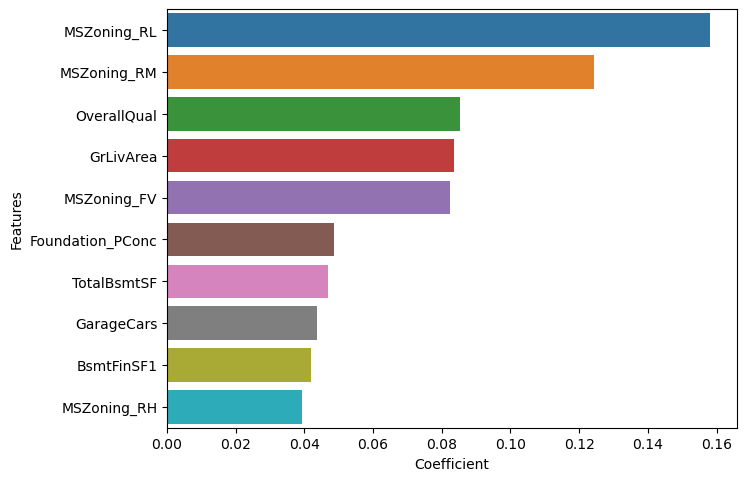

In [345]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = Housing_temp_df_lasso)
plt.show()

In [346]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = Housing_lasso.predict(X_train)
y_pred_test = Housing_lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9142070561500176
0.8974366579121472
10.494223465119088
5.5909951325255545
0.011394379440954493
0.014118674577084734


In [347]:
# Conclusion Lasso:

# Above model shows top 10 variables which will help in predicting house prices, Variables are listed below:
# 1) MSZoning_RL
# 2) MSZoning_RM
# 3) OverallQual
# 4) MSZoning_FV
# 5) GRLivArea
# 6) Foundation_PConc
# 7) TotalBsmtSF
# 8) GarageCars
# 9) BsmtFinSF1
# 10) MSZoning_RH

# # Conclusion :

# Best Alpha value in case of Ridge and Lasso analysis is as below:

# Ridge - 0.6
# Lasso - 0.0001

# The Mean Squared error in case of Ridge and Lasso are:

# Ridge - 0.01415
# Lasso - 0.01411

# The Mean Squared Error of Lasso is less then Ridge
# Also, in case of Lasso some features get reduced ( due to some of coefficients of feature became 0), Lasso has a better performance over Ridge.

# Hence based on Lasso, the factors that generally affect the price are:
# 1) MSZoning - Zoning classification 
# 2) OverallQual: Rates the overall material and finish of the house 
# 3) GrLivArea: Above grade (ground) living area square feet
# 4) Foundation: Type of foundation
# 5) TotalBsmtSF: Total square feet of basement area
# 6) GarageCars: Size of garage in car capacity
# 7) BsmtFinSF1: Type 1 finished square feet


# Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting
# the price of a house.

# Question 1
# What is the optimal value of alpha for ridge and lasso regression? What will be the changes 
# in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


# As per question 1 in second part of assignment, we need to use double value of Alpha in both cases so lets check and find Answer. 


# Ridge

In [348]:

# Alpha value : 0.6
# Double the value : 1.2
# lets again check with calcualtion of new Alpha:

#Fitting Ridge model for alpha = 1.2 and printing coefficients which have been penalised
alpha = 1.2
Housing_ridge = Ridge(alpha=alpha)

Housing_ridge.fit(X_train, y_train)
print(Housing_ridge.coef_)

[ 0.01692086  0.08497843  0.03707065  0.04132523  0.00790792 -0.00072715
  0.04763032  0.03147988  0.04308302  0.0045764   0.06265401  0.0118829
  0.04364969 -0.01382629 -0.02805127  0.0181965   0.0198984   0.01562974
  0.01445967  0.01777578 -0.02087543  0.01853137  0.08061459  0.03874035
  0.15480245  0.12173232  0.02108931  0.0150797  -0.01267627  0.0142474
 -0.02380363 -0.00168787 -0.02439185 -0.00168787  0.01594439  0.02686755
  0.04889801  0.01888926  0.00667595 -0.01489539]


In [349]:
# Check mean square error
mean_squared_error(y_test,Housing_ridge.predict(X_test))

0.0141270763934196

In [350]:
# Let put features and its coef together
Housing_ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':Housing_ridge.coef_.round(4)})
Housing_ridge_df.reset_index(drop=True, inplace=True)
Housing_ridge_df

Features  Coefficient
0                LotArea       0.0169
1            OverallQual       0.0850
2            OverallCond       0.0371
3             BsmtFinSF1       0.0413
4             BsmtFinSF2       0.0079
5              BsmtUnfSF      -0.0007
6            TotalBsmtSF       0.0476
7               1stFlrSF       0.0315
8               2ndFlrSF       0.0431
9           LowQualFinSF       0.0046
10             GrLivArea       0.0627
11              HalfBath       0.0119
12            GarageCars       0.0436
13          IsRemodelled      -0.0138
14     Built_Remodel_Age      -0.0281
15        b_BsmtExposure       0.0182
16           b_HeatingQC       0.0199
17         b_KitchenQual       0.0156
18         b_FireplaceQu       0.0145
19        b_GarageFinish       0.0178
20            b_BldgType      -0.0209
21       b_SaleCondition       0.0185
22           MSZoning_FV       0.0806
23           MSZoning_RH       0.0387
24           MSZoning_RL       0.1548
25           MSZoning_RM       0.1217
26  Neighborhood_Crawfor       0.0211
27  Neighborhood_NridgHt       0.0151
28  Neighborhood_OldTown      -0.0127
29  Neighborhood_Somerst       0.0142
30   Exterior1st_BrkComm      -0.0238
31    Exterior1st_CBlock      -0.0017
32   Exterior1st_Wd Sdng      -0.0244
33    Exterior2nd_CBlock      -0.0017
34   Exterior2nd_Wd Sdng       0.0159
35     Foundation_CBlock       0.0269
36      Foundation_PConc       0.0489
37       Foundation_Slab       0.0189
38     GarageType_Attchd       0.0067
39           SaleType_WD      -0.0149

In [351]:
# we will move data as a dictionary for bar plot later
Housing_ridge_coef_dict = dict(pd.Series(Housing_ridge.coef_.round(4), index = X_train.columns))
Housing_ridge_coef_dict

{'LotArea': 0.0169,
 'OverallQual': 0.085,
 'OverallCond': 0.0371,
 'BsmtFinSF1': 0.0413,
 'BsmtFinSF2': 0.0079,
 'BsmtUnfSF': -0.0007,
 'TotalBsmtSF': 0.0476,
 '1stFlrSF': 0.0315,
 '2ndFlrSF': 0.0431,
 'LowQualFinSF': 0.0046,
 'GrLivArea': 0.0627,
 'HalfBath': 0.0119,
 'GarageCars': 0.0436,
 'IsRemodelled': -0.0138,
 'Built_Remodel_Age': -0.0281,
 'b_BsmtExposure': 0.0182,
 'b_HeatingQC': 0.0199,
 'b_KitchenQual': 0.0156,
 'b_FireplaceQu': 0.0145,
 'b_GarageFinish': 0.0178,
 'b_BldgType': -0.0209,
 'b_SaleCondition': 0.0185,
 'MSZoning_FV': 0.0806,
 'MSZoning_RH': 0.0387,
 'MSZoning_RL': 0.1548,
 'MSZoning_RM': 0.1217,
 'Neighborhood_Crawfor': 0.0211,
 'Neighborhood_NridgHt': 0.0151,
 'Neighborhood_OldTown': -0.0127,
 'Neighborhood_Somerst': 0.0142,
 'Exterior1st_BrkComm': -0.0238,
 'Exterior1st_CBlock': -0.0017,
 'Exterior1st_Wd Sdng': -0.0244,
 'Exterior2nd_CBlock': -0.0017,
 'Exterior2nd_Wd Sdng': 0.0159,
 'Foundation_CBlock': 0.0269,
 'Foundation_PConc': 0.0489,
 'Foundation_Slab'

In [352]:
# Lets again do RFE for top 12 variables 

# Do an RFE to minimise the features to 12
X_train_ridge_top = X_train[Housing_ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge_top, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=12, step=1)            
rfe = rfe.fit(X_train_ridge_top, y_train)

In [353]:
# Method to get the coefficient values and then identifying top 10 variables for house pricing

def find(x):
    return Housing_ridge_coef_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

Housing_temp_df = pd.DataFrame(list(zip( X_train_ridge_top.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
Housing_temp_df = Housing_temp_df.loc[Housing_temp_df['rfe_support'] == True]
Housing_temp_df.reset_index(drop=True, inplace=True)

Housing_temp_df['Coefficient'] = Housing_temp_df['Features'].apply(find)
Housing_temp_df = Housing_temp_df.sort_values(by=['Coefficient'], ascending=False)
Housing_temp_df = Housing_temp_df.head(10)
Housing_temp_df

Features  rfe_support  rfe_ranking  Coefficient
9        MSZoning_RL         True            1       0.1548
10       MSZoning_RM         True            1       0.1217
0        OverallQual         True            1       0.0850
7        MSZoning_FV         True            1       0.0806
4          GrLivArea         True            1       0.0627
11  Foundation_PConc         True            1       0.0489
3        TotalBsmtSF         True            1       0.0476
5         GarageCars         True            1       0.0436
2         BsmtFinSF1         True            1       0.0413
8        MSZoning_RH         True            1       0.0387

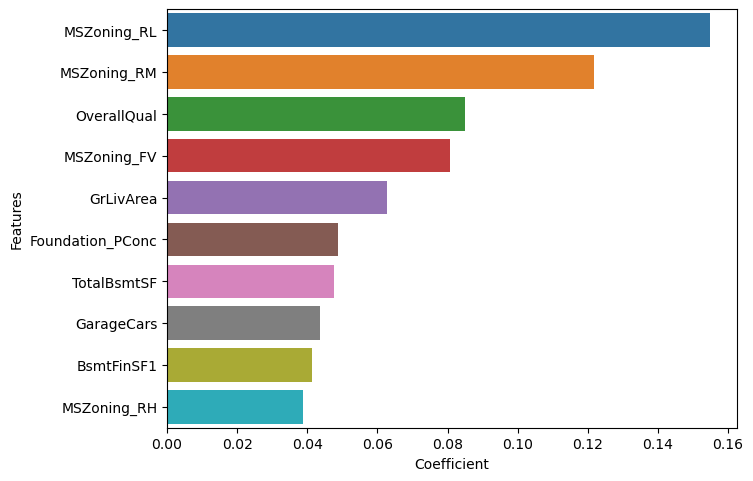

In [354]:
# Let draw bar plot for top 10 variables which will impact prices of house

plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', data = Housing_temp_df)
plt.show()

In [355]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = Housing_ridge.predict(X_train)
y_pred_test = Housing_ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9141946396518459
0.8973756239703131
10.49574225560023
5.5943222517941615
0.011396028507709263
0.0141270763934196


# Lasso

In [356]:
# Alpha value : 0.0001
# Double the value : 0.0002
# lets again check with calcualtion of new Alpha:

#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha = 0.0002

Housing_lasso = Lasso(alpha=alpha)
        
Housing_lasso.fit(X_train, y_train) 


Lasso(alpha=0.0002)

In [357]:
Housing_lasso.coef_

array([ 1.68109717e-02,  8.54839712e-02,  3.69660666e-02,  4.19441644e-02,
        8.07725124e-03, -0.00000000e+00,  4.64249146e-02,  0.00000000e+00,
        1.90521265e-03, -0.00000000e+00,  1.07181614e-01,  1.18640426e-02,
        4.36404937e-02, -1.36854404e-02, -2.79097339e-02,  1.79948066e-02,
        1.96852429e-02,  1.56320884e-02,  1.43122417e-02,  1.78082267e-02,
       -2.04380302e-02,  1.85675755e-02,  7.95371304e-02,  3.77905206e-02,
        1.52400448e-01,  1.19002499e-01,  2.07515657e-02,  1.47345284e-02,
       -1.25502463e-02,  1.38275706e-02, -2.35518610e-02, -3.21769701e-03,
       -2.33317471e-02, -3.11826295e-05,  1.47595773e-02,  2.56015071e-02,
        4.78487888e-02,  1.81378581e-02,  6.59209853e-03, -1.46257694e-02])

In [358]:
# Check the mean squared error

mean_squared_error(y_test, Housing_lasso.predict(X_test))

0.014054323079206467

In [359]:

# Add important features and coef in a dataframe

Housing_lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':Housing_lasso.coef_.round(4)})
Housing_lasso_df = Housing_lasso_df[Housing_lasso_df['Coefficient'] != 0.00]
Housing_lasso_df.reset_index(drop=True, inplace=True)
Housing_lasso_df


Features  Coefficient
0                LotArea       0.0168
1            OverallQual       0.0855
2            OverallCond       0.0370
3             BsmtFinSF1       0.0419
4             BsmtFinSF2       0.0081
5            TotalBsmtSF       0.0464
6               2ndFlrSF       0.0019
7              GrLivArea       0.1072
8               HalfBath       0.0119
9             GarageCars       0.0436
10          IsRemodelled      -0.0137
11     Built_Remodel_Age      -0.0279
12        b_BsmtExposure       0.0180
13           b_HeatingQC       0.0197
14         b_KitchenQual       0.0156
15         b_FireplaceQu       0.0143
16        b_GarageFinish       0.0178
17            b_BldgType      -0.0204
18       b_SaleCondition       0.0186
19           MSZoning_FV       0.0795
20           MSZoning_RH       0.0378
21           MSZoning_RL       0.1524
22           MSZoning_RM       0.1190
23  Neighborhood_Crawfor       0.0208
24  Neighborhood_NridgHt       0.0147
25  Neighborhood_OldTown      -0.0126
26  Neighborhood_Somerst       0.0138
27   Exterior1st_BrkComm      -0.0236
28    Exterior1st_CBlock      -0.0032
29   Exterior1st_Wd Sdng      -0.0233
30   Exterior2nd_Wd Sdng       0.0148
31     Foundation_CBlock       0.0256
32      Foundation_PConc       0.0478
33       Foundation_Slab       0.0181
34     GarageType_Attchd       0.0066
35           SaleType_WD      -0.0146

In [360]:
# add the Features and Coefficients in dictionary

Housing_lasso_coeff_dict = dict(pd.Series(Housing_lasso.coef_, index = X_train.columns))
Housing_lasso_coeff_dict



{'LotArea': 0.016810971670304542,
 'OverallQual': 0.08548397118195436,
 'OverallCond': 0.03696606657330655,
 'BsmtFinSF1': 0.041944164372642326,
 'BsmtFinSF2': 0.008077251240781862,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.046424914647257474,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0019052126455506753,
 'LowQualFinSF': -0.0,
 'GrLivArea': 0.10718161408381963,
 'HalfBath': 0.011864042606272917,
 'GarageCars': 0.04364049373864691,
 'IsRemodelled': -0.013685440407428608,
 'Built_Remodel_Age': -0.027909733934010972,
 'b_BsmtExposure': 0.017994806598905382,
 'b_HeatingQC': 0.019685242946379414,
 'b_KitchenQual': 0.015632088359849944,
 'b_FireplaceQu': 0.014312241715818247,
 'b_GarageFinish': 0.0178082266675125,
 'b_BldgType': -0.02043803024641868,
 'b_SaleCondition': 0.018567575516245136,
 'MSZoning_FV': 0.07953713038986658,
 'MSZoning_RH': 0.037790520564096715,
 'MSZoning_RL': 0.15240044776151185,
 'MSZoning_RM': 0.11900249870153373,
 'Neighborhood_Crawfor': 0.02075156570101684,
 'Neighborhood_Nridg

In [361]:
# Lets do RFE to minimise the features to 12

X_train_lasso = X_train[Housing_lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=12, step=1)            
rfe = rfe.fit(X_train_lasso, y_train)


In [362]:
# Get the coefficient values

def find(x):
    return Housing_lasso_coeff_dict[x]

In [363]:
# Assign top 10 features to dataframe for bar plot

Housing_temp_df_lasso = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
Housing_temp_df_lasso = Housing_temp_df_lasso.loc[Housing_temp_df_lasso['rfe_support'] == True]
Housing_temp_df_lasso.reset_index(drop=True, inplace=True)

Housing_temp_df_lasso['Coefficient'] = Housing_temp_df_lasso['Features'].apply(find)
Housing_temp_df_lasso = Housing_temp_df_lasso.sort_values(by=['Coefficient'], ascending=False)
Housing_temp_df_lasso = Housing_temp_df_lasso.head(10)
Housing_temp_df_lasso


Features  rfe_support  rfe_ranking  Coefficient
9        MSZoning_RL         True            1     0.152400
10       MSZoning_RM         True            1     0.119002
4          GrLivArea         True            1     0.107182
0        OverallQual         True            1     0.085484
7        MSZoning_FV         True            1     0.079537
11  Foundation_PConc         True            1     0.047849
3        TotalBsmtSF         True            1     0.046425
5         GarageCars         True            1     0.043640
2         BsmtFinSF1         True            1     0.041944
8        MSZoning_RH         True            1     0.037791

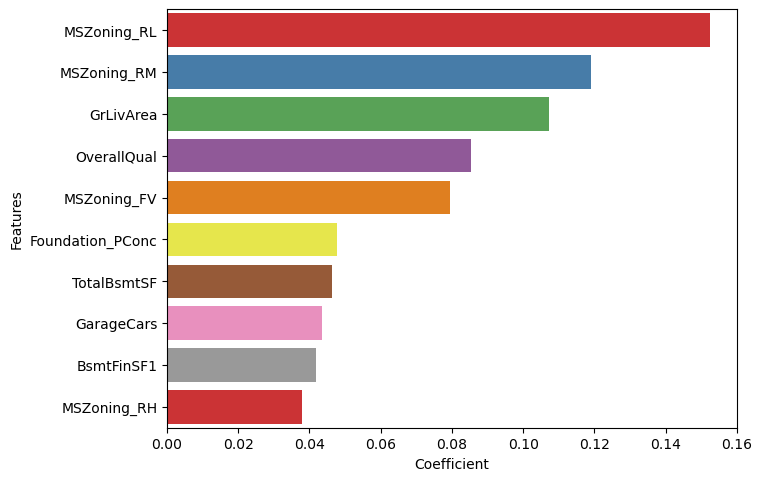

In [364]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(25,25))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = Housing_temp_df_lasso)
plt.show()

In [365]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = Housing_lasso.predict(X_train)
y_pred_test = Housing_lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9141601509926089
0.8979041313038398
10.499960920688554
5.565511939365761
0.011400609034406683
0.014054323079206467


In [366]:
# Question 3
# After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables.
# Which are the five most important predictor variables now?


In [367]:
X_train_lasso

LotArea  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
1080  0.069642    -0.765705     2.173499   -1.011415   -0.282102    -0.824905   
274   1.790845    -0.765705    -0.522732    1.081248   -0.282102     0.436073   
323  -0.677612    -0.765705    -1.421475   -0.264924    1.671561     0.155554   
864  -0.252209     0.778604    -0.522732    0.727909   -0.282102     0.904515   
325  -0.506891     0.006449     0.376012    0.912043   -0.282102    -0.318335   
570   0.837046    -0.765705    -0.522732   -1.011415   -0.282102    -0.073220   
1125  0.583204     1.550758     1.274755   -1.011415   -0.282102    -0.579790   
693   0.299415     0.778604    -0.522732   -0.031023   -0.282102    -0.067773   
538  -1.375889     0.006449    -0.522732    0.693073   -0.282102    -0.427274   
1222  0.270029     0.778604    -0.522732    0.817488   -0.282102    -0.035091   
872  -0.548872    -0.765705     1.274755    1.233034   -0.282102     0.253599   
676   0.657370     0.778604     1.274755   -1.011415   -0.282102     0.640336   
746  -0.230099     0.778604    -0.522732   -0.961649   -0.282102     1.223163   
806  -0.164050    -1.537859     0.376012   -0.302249   -0.282102    -0.146754   
912   0.132613    -0.765705    -0.522732   -1.011415   -0.282102    -2.736798   
461   0.069642     0.778604     3.072242   -0.660564   -0.282102    -0.860310   
599   2.281458     0.006449    -0.522732   -1.011415   -0.282102    -0.252971   
892   0.028221     1.550758    -0.522732    1.661022   -0.282102     1.065201   
575  -1.332509     1.550758    -0.522732   -0.951696   -0.282102     1.495513   
970  -0.392144     0.006449     0.376012    0.319827   -0.282102    -0.857586   
588  -0.602047    -0.765705    -0.522732   -1.011415   -0.282102    -2.736798   
715   0.159200     0.778604    -0.522732    1.133502   -0.282102     0.305346   
321   0.531148     0.006449    -0.522732   -0.180322    3.332838     0.531396   
710   0.221332     0.778604    -0.522732    0.620912   -0.282102    -0.133137   
885  -1.726566     0.778604    -0.522732   -1.011415   -0.282102     0.711146   
666   0.311170     1.550758    -0.522732   -1.011415   -0.282102    -0.304717   
1022  0.684237     0.778604    -0.522732   -1.011415   -0.282102    -0.429998   
926  -0.462112    -0.765705    -0.522732   -0.668029    2.827810    -0.334675   
39   -0.047904    -0.765705     1.274755    0.847347    0.335893    -0.449062   
30    0.475174     1.550758    -0.522732   -1.011415   -0.282102     0.623995   
242  -1.152832    -0.765705    -0.522732   -1.011415   -0.282102    -0.884821   
707  -0.070014    -0.765705     0.376012    1.718253   -0.282102     0.250876   
923   0.024583    -0.765705    -0.522732   -0.205205   -0.282102    -0.252971   
136   0.043054     0.778604    -0.522732   -1.011415   -0.282102    -0.329229   
310  -0.225901    -2.310013    -1.421475   -1.011415   -0.282102    -2.736798   
1100 -0.631713    -0.765705    -0.522732   -0.563520    2.203169    -0.301994   
917   0.708586     0.778604    -0.522732    0.705514   -0.282102     1.359338   
986  -0.225901    -2.310013    -1.421475   -1.011415   -0.282102    -2.736798   
1164  0.122817     0.006449    -0.522732    0.404430    0.256152     0.880003   
1307 -2.188073    -0.765705     1.274755    0.364617   -0.282102    -1.020996   
527   0.783311    -0.765705    -0.522732   -1.011415   -0.282102     0.122872   
3     0.055648     0.778604    -0.522732   -0.473941   -0.282102    -0.677836   
111  -0.921099    -1.537859    -0.522732   -1.011415   -0.282102    -0.743200   
1147  0.557736    -0.765705    -0.522732    0.133205   -0.282102    -0.356463   
1137  0.066004     0.778604    -0.522732    0.618424   -0.282102    -0.405486   
1232 -0.518086     0.778604    -0.522732    0.314851   -0.282102    -0.519873   
996  -0.266203    -3.082168    -0.522732   -0.289807   -0.282102    -1.946984   
621  -1.200410     0.778604    -0.522732    1.048900    0.927308     0.504161   
1024  0.380858    -0.765705    -0.5227

In [368]:
y_train

1192    11.736077
300     11.964007
358     11.775297
958     12.128117
360     11.957618
626     11.848690
1244    12.345839
766     12.188423
593     11.849405
1354    12.367345
967     11.813037
747     12.491176
827     12.149508
896     11.575910
1011    11.512935
508     11.989166
658     11.487618
990     12.759961
631     12.252484
1073    11.979805
646     11.495789
792     12.505403
355     12.086732
787     12.358798
982     11.982279
737     12.387982
1128    12.278398
1025    11.630717
42      11.877576
32      12.100162
264     11.198228
783     12.016733
1022    11.373675
147     12.312687
342     11.379406
1215    11.736077
1016    12.220966
1090    11.439290
1286    11.870607
1449    11.429555
579     11.786770
3       11.849405
121     11.512935
1269    11.877576
1258    12.154785
1365    12.283038
1100    11.002117
685     12.242891
1131    11.445727
414     12.337105
648     11.951187
1308    11.898195
347     11.967187
483     12.007628
486     11.957618
1177    11

In [369]:
X_train_lasso.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'HalfBath', 'GarageCars',
       'IsRemodelled', 'Built_Remodel_Age', 'b_BsmtExposure', 'b_HeatingQC',
       'b_KitchenQual', 'b_FireplaceQu', 'b_GarageFinish', 'b_BldgType',
       'b_SaleCondition', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'GarageType_Attchd', 'SaleType_WD'],
      dtype='object')

In [370]:
# 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', are top 5 predictors lets drop these

X_train_lasso1 = X_train_lasso.drop(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2'], axis=1)
X_test1 = X_test.drop(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2'], axis=1)

In [371]:
X_train_lasso1.head()

TotalBsmtSF  2ndFlrSF  GrLivArea  HalfBath  GarageCars  IsRemodelled  \
1080    -0.824905  0.695438   0.031418 -0.740145   -0.974093      1.066765   
274      0.436073 -0.801637  -0.265089 -0.740145   -0.974093     -0.937414   
323      0.155554 -0.801637  -0.230205 -0.740145   -0.974093     -0.937414   
864      0.904515 -0.801637  -0.262908 -0.740145    0.390673     -0.937414   
325     -0.318335 -0.801637  -1.189493 -0.740145    0.390673     -0.937414   

      Built_Remodel_Age  b_BsmtExposure  b_HeatingQC  b_KitchenQual  ...  \
1080          -0.505571        0.428921    -0.137665       0.825476  ...   
274            1.409817        0.428921    -1.179648      -0.738772  ...   
323            1.170394        1.413047     0.904317       0.825476  ...   
864           -0.936533        0.428921     0.904317       0.825476  ...   
325            0.260584        1.413047     0.904317      -0.738772  ...   

      Neighborhood_Somerst  Exterior1st_BrkComm  Exterior1st_CBlock  \
1080             -0.252612            -0.038999           -0.027566   
274              -0.252612            -0.038999           -0.027566   
323              -0.252612            -0.038999           -0.027566   
864              -0.252612            -0.038999           -0.027566   
325              -0.252612            -0.038999           -0.027566   

      Exterior1st_Wd Sdng  Exterior2nd_Wd Sdng  Foundation_CBlock  \
1080            -0.394034            -0.388875          -0.887116   
274             -0.394034            -0.388875           1.127249   
323              2.537849            -0.388875           1.127249   
864             -0.394034            -0.388875          -0.887116   
325             -0.394034            -0.388875           1.127249   

      Foundation_PConc  Foundation_Slab  GarageType_Attchd  SaleType_WD  
1080          1.144782        -0.136241          -1.180909     0.381074  
274          -0.873529        -0.136241           0.846805     0.381074  
323          -0.873529        -0.136241          -1.180909     0.381074  
864           1.144782        -0.136241           0.846805     0.381074  
325          -0.873529        -0.136241           0.846805     0.381074  

[5 rows x 31 columns]

In [372]:
X_test1.head()

BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
261   0.162377    -1.034614 -1.483212  0.683556     -0.117654  -0.452586   
991   1.726502     0.841874  0.603268 -0.801637     -0.117654  -0.313053   
554  -1.011306     0.065678 -0.259790 -0.801637     -0.117654  -0.934410   
49   -1.307666    -0.514426 -0.904812 -0.801637     -0.117654  -1.398792   
857  -0.562060    -0.383698 -0.759455 -0.801637     -0.117654  -1.294143   

     HalfBath  GarageCars  IsRemodelled  Built_Remodel_Age  ...  \
261  1.253251    0.390673      1.066765          -1.128072  ...   
991 -0.740145    0.390673     -0.937414          -1.080187  ...   
554 -0.740145   -0.974093     -0.937414           1.074624  ...   
49  -0.740145    0.390673     -0.937414           1.122509  ...   
857 -0.740145    0.390673      1.066765          -0.888648  ...   

     Exterior1st_BrkComm  Exterior1st_CBlock  Exterior1st_Wd Sdng  \
261            -0.038999           -0.027566            -0.394034   
991            -0.038999           -0.027566            -0.394034   
554            -0.038999           -0.027566            -0.394034   
49             -0.038999           -0.027566             2.537849   
857            -0.038999           -0.027566            -0.394034   

     Exterior2nd_CBlock  Exterior2nd_Wd Sdng  Foundation_CBlock  \
261           -0.027566            -0.388875          -0.887116   
991           -0.027566            -0.388875          -0.887116   
554           -0.027566            -0.388875           1.127249   
49            -0.027566             2.571520           1.127249   
857           -0.027566            -0.388875           1.127249   

     Foundation_PConc  Foundation_Slab  GarageType_Attchd  SaleType_WD  
261          1.144782        -0.136241          -1.180909    -2.624162  
991          1.144782        -0.136241           0.846805     0.381074  
554         -0.873529        -0.136241           0.846805     0.381074  
49          -0.873529        -0.136241          -1.180909     0.381074  
857         -0.873529        -0.136241          -1.180909     0.381074  

[5 rows x 35 columns]

# Lasso

In [373]:
alpha = 0.0001
lasso_housing = Lasso(alpha=alpha)
lasso_housing.fit(X_train_lasso1, y_train) 

Lasso(alpha=0.0001)

In [374]:
#important predictor variables
betas_housing = pd.DataFrame(index=X_train_lasso1.columns)
betas_housing.rows = X_train_lasso1.columns
betas_housing['Lasso_Housing'] = lasso_housing.coef_
pd.set_option('display.max_rows', None)
betas_housing

Lasso_Housing
TotalBsmtSF                0.074108
2ndFlrSF                   0.013773
GrLivArea                  0.113868
HalfBath                   0.013784
GarageCars                 0.050693
IsRemodelled              -0.013010
Built_Remodel_Age         -0.045123
b_BsmtExposure             0.030866
b_HeatingQC                0.022040
b_KitchenQual              0.038370
b_FireplaceQu              0.025710
b_GarageFinish             0.025754
b_BldgType                -0.028729
b_SaleCondition            0.021580
MSZoning_FV                0.108356
MSZoning_RH                0.052498
MSZoning_RL                0.200750
MSZoning_RM                0.162973
Neighborhood_Crawfor       0.031414
Neighborhood_NridgHt       0.020373
Neighborhood_OldTown      -0.011062
Neighborhood_Somerst       0.012928
Exterior1st_BrkComm       -0.028683
Exterior1st_CBlock        -0.004854
Exterior1st_Wd Sdng       -0.023429
Exterior2nd_Wd Sdng        0.018424
Foundation_CBlock          0.030769
Foundation_PConc           0.041584
Foundation_Slab            0.016054
GarageType_Attchd          0.019582
SaleType_WD               -0.010501

In [375]:
# Top 5 variables are:
# 1. GrLivArea
# 2. MSZoning
# 3. GarageCars
# 4. Foundation
# 5. TotalBsmtSF